# Pacotes

## Versão das bibliotecas

In [ ]:
shap==0.45.0
scikit-optimize==0.10.0
pandas==2.1.4
scikit-learn==1.4.2
Unidecode==1.3.8 
scikit-plot==0.3.7 
imbalanced-learn==0.12.0 
hyperopt==0.2.7 
scipy==1.12.0 
ppscore==0.0.2 
statsmodels==0.14.1 
missingno==0.5.2 
xgboost==2.0.3 
lightgbm==4.3.0 
mlflow==2.12.1 
matplotlib==3.8.3
matplotlib-inline==0.1.6

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install --upgrade pandas dask

In [ ]:
pip install dask

In [ ]:
!pip install Boruta
pip install sklearn-genetic-opt
pip install sklearn_stability_selection

## Import das bibliotecas

In [ ]:
# Bibliotecas padrão e de manipulação de dados
import os
import pickle
import re

import numpy as np
import pandas as pd
from pytz import timezone
from unidecode import unidecode
from datetime import datetime

pd.set_option('display.max_columns', None)

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Machine Learning - pré-processamento e métricas
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import make_pipeline


from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, average_precision_score, classification_report, confusion_matrix, f1_score,
    log_loss, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve
)
from sklearn.model_selection import (
    GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score, train_test_split
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from scipy.stats import ks_2samp
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
# Machine Learning - modelos e otimização
import shap
import sklearn
import statsmodels.api as sm
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, space_eval, tpe
from hyperopt import fmin, tpe, Trials, hp
from hyperopt.pyll import scope
from shap import Explainer
from skopt import forest_minimize
from xgboost import plot_importance, plot_tree
import lightgbm as lgb
import missingno as msno
import ppscore as pps


# Salvamento e carregamento de modelos
import mlflow
from mlflow.models import infer_signature
from mlflow.models.signature import infer_signature
import mlflow.lightgbm

# Outras bibliotecas
import warnings


warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols


from scipy.stats import chi2_contingency, kruskal, fisher_exact, mannwhitneyu, power_divergence

from google.cloud import bigquery

print(f"Pandas version: {pd.__version__}")
print(f"PPScore version: {pps.__version__}")
print(f"missingno version: {msno.__version__}")
print(f"xgboost version: {xgb.__version__}")
print(f"shap version: {shap.__version__}")
print(f"sklearn version: {sklearn.__version__}")
print(f"mlflow version: {mlflow.__version__}")

#print(f"hyperopt version: {hyperopt.__version__}")

In [2]:
# Bibliotecas padrão e de manipulação de dados
from datetime import date
import pandas as pd
import numpy as np
from pytz import timezone
import os 
import warnings

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine Learning - Modelos
import xgboost as xgb
from xgboost import plot_importance
import catboost as ctb
from catboost import Pool
from sklearn.tree import DecisionTreeClassifier

# Machine Learning - Pré-processamento, Seleção e Métricas
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Configurações e Ferramentas Auxiliares
import sklearn
import shap
import ppscore as pps

# Ignorar avisos e configurações de exibição
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Impressão de versões
print(xgb.__version__)
print(sklearn.__version__)


2.0.2
1.5.2


In [3]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import clone

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from boruta import BorutaPy

import pandas as pd
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.neighbors import KDTree
from sklearn.preprocessing import LabelEncoder

# Dataset

In [6]:
file_path = 'gol/dados_tratados/historico_voo_tratados.csv'
df = pd.read_csv(file_path)

In [7]:
df = df.sample(n=15000)

In [ ]:
df.to_csv('dataset_teste_feature_selection_anac.csv')

In [8]:
df['uf_origem'] = df['uf_origem'].fillna('EXTRANGEIRO')
df['uf_destino'] = df['uf_destino'].fillna('EXTRANGEIRO')

# Mapeamento para dias da semana e meses
mapeamento_dias = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}
mapeamento_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
    7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Aplicando os mapeamentos
df['dia_semana_partida'] = df['dia_semana_partida'].map(mapeamento_dias)
df['dia_semana_chegada'] = df['dia_semana_chegada'].map(mapeamento_dias)
df['mes_partida'] = df['mes_partida'].map(mapeamento_meses)
df['mes_chegada'] = df['mes_chegada'].map(mapeamento_meses)
df= df.fillna('SI')

In [ ]:
pip install pyspark

## Versão das bibliotecas

In [ ]:
shap==0.45.0
scikit-optimize==0.10.0
pandas==2.1.4
scikit-learn==1.4.2
Unidecode==1.3.8 
scikit-plot==0.3.7 
imbalanced-learn==0.12.0 
hyperopt==0.2.7 
scipy==1.12.0 
ppscore==0.0.2 
statsmodels==0.14.1 
missingno==0.5.2 
xgboost==2.0.3 
lightgbm==4.3.0 
mlflow==2.12.1 
matplotlib==3.8.3
matplotlib-inline==0.1.6

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install --upgrade pandas dask

In [ ]:
pip install google-cloud-bigquery

In [ ]:
pip install dask

## Import das bibliotecas

In [1]:
# Bibliotecas padrão e de manipulação de dados
import os
import pickle
import re

import numpy as np
import pandas as pd
from pytz import timezone
from unidecode import unidecode
from datetime import datetime

pd.set_option('display.max_columns', None)

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Machine Learning - pré-processamento e métricas
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline


from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, average_precision_score, classification_report, confusion_matrix, f1_score,
    log_loss, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve
)
from sklearn.model_selection import (
    GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score, train_test_split
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Machine Learning - modelos e otimização
import shap
import sklearn
import statsmodels.api as sm
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, space_eval, tpe
from hyperopt import fmin, tpe, Trials, hp
from hyperopt.pyll import scope
from shap import Explainer
from skopt import forest_minimize
from xgboost import plot_importance, plot_tree
import lightgbm as lgb
import missingno as msno
import ppscore as pps


# Salvamento e carregamento de modelos
import mlflow
from mlflow.models import infer_signature
from mlflow.models.signature import infer_signature
import mlflow.lightgbm

# Outras bibliotecas
import warnings


warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols


from scipy.stats import chi2_contingency, kruskal, fisher_exact, mannwhitneyu, power_divergence

from google.cloud import bigquery

print(f"Pandas version: {pd.__version__}")
print(f"PPScore version: {pps.__version__}")
print(f"missingno version: {msno.__version__}")
print(f"xgboost version: {xgb.__version__}")
print(f"shap version: {shap.__version__}")
print(f"sklearn version: {sklearn.__version__}")
print(f"mlflow version: {mlflow.__version__}")

#print(f"hyperopt version: {hyperopt.__version__}")

/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Pandas version: 2.1.4
PPScore version: 0.0.2
missingno version: 0.5.2
xgboost version: 2.0.3
shap version: 0.45.0
sklearn version: 1.4.2
mlflow version: 2.15.1


In [ ]:
Fea

In [14]:
# Definir o caminho do diretório e do arquivo CSV
diretorio = 'gol/dados_tratados'
nome_arquivo = 'historico_voo_tratados_train.csv'
caminho_completo = os.path.join(diretorio, nome_arquivo)
df.to_csv(caminho_completo, index=False)

# Feature Selection

## Testes estatísticos 

### Chi-quadrado

In [9]:
def variaveis_significativas_chi2(df: pd.DataFrame, y: str, alpha: float = 0.05) -> list:
    """
    Realiza o teste de qui-quadrado para verificar a associação entre variáveis categóricas 
    e a variável dependente. Retorna uma lista de variáveis que são consideradas 
    significativamente associadas à variável dependente com base no valor de p.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p-valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    list
        Uma lista contendo o nome das variáveis preditoras categóricas que têm associação significativa com a variável dependente.
    
    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame ou se não houver variáveis categóricas.
    """
    
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Selecionar apenas colunas categóricas para o teste de qui-quadrado
    colunas_categ = df.select_dtypes(include=['object'])
    
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o teste de qui-quadrado.")
    
    # Lista de variáveis preditoras
    preditoras = list(colunas_categ)

    # Inicializar lista de colunas significativas
    colunas_significativas = []

    # Loop pelas colunas categóricas e realizar o teste de qui-quadrado
    for coluna in preditoras:
        try:
            tabela_contingencia = pd.crosstab(df[coluna], df[y])
            chi2, p, dof, expected = chi2_contingency(tabela_contingencia)
            if p < alpha:
                colunas_significativas.append(coluna)
        except ValueError as e:
            print(f"Erro ao processar a variável '{coluna}': {e}")
            continue

    return colunas_significativas

In [10]:
# Exemplo de como usar a função
colunas_significativas = variaveis_significativas_chi2(df, 'status_do_voo')
print(colunas_significativas)

['nome_empresas', 'numero_voo', 'codigo_di', 'codigo_tipo_linha', 'partida_prevista', 'partida_real', 'chegada_prevista', 'chegada_real', 'situacao_voo', 'descricao_origem', 'pais_origem', 'continente_origem', 'descricao_destino', 'pais_destino', 'continente_destino', 'status_do_voo', 'delta_tempo_partida_delta', 'delta_tempo_chegada_delta', 'cidade_origem', 'uf_origem', 'cidade_destino', 'uf_destino', 'mes_partida', 'dia_semana_partida', 'dia_mes_partida', 'mes_chegada', 'dia_semana_chegada', 'dia_mes_chegada', 'rota']


### Teste G

In [11]:
def variaveis_significativas_teste_g(df: pd.DataFrame, y: str, alpha: float = 0.05) -> list:
    """
    Realiza o Teste G (Log-Likelihood Test) para verificar a associação entre variáveis categóricas 
    e a variável dependente. Retorna uma lista de variáveis que são consideradas 
    significativamente associadas à variável dependente com base no valor de p.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p-valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    list
        Uma lista contendo o nome das variáveis preditoras categóricas que têm associação significativa com a variável dependente.
    
    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame ou se não houver variáveis categóricas.
    """
    
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Selecionar apenas colunas categóricas
    colunas_categ = df.select_dtypes(include=['object'])
    
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o Teste G.")

    # Lista de variáveis categóricas
    variaveis_categoricas = list(colunas_categ.columns)

    # Inicializar lista de colunas significativas e dicionário de resultados
    colunas_significativas = []
    resultados_teste_g = {}

    # Loop pelas variáveis categóricas e realizar o Teste G
    for variavel in variaveis_categoricas:
        try:
            tabela_contingencia = pd.crosstab(df[y], df[variavel])
            
            # Realizando o Teste G (Log-Likelihood Test)
            stat, p_valor = power_divergence(tabela_contingencia, lambda_="log-likelihood")
            
            # Garantindo que o p_valor é um float
            if isinstance(p_valor, (list, np.ndarray)):
                p_valor = p_valor[0]
            
            # Verificando se o p-valor é menor que o nível de significância
            if p_valor < alpha:
                colunas_significativas.append(variavel)
            
            # Armazenando os resultados do teste
            resultados_teste_g[variavel] = (stat, p_valor)

        except ValueError as e:
            print(f"Erro ao processar a variável '{variavel}': {e}")
            continue

    return colunas_significativas

In [12]:
# Exemplo de como usar a função
colunas_significativas_g = variaveis_significativas_teste_g(df, 'status_do_voo')
print(colunas_significativas_g)

['nome_empresas', 'codigo_di', 'codigo_tipo_linha', 'situacao_voo', 'descricao_origem', 'pais_origem', 'continente_destino', 'status_do_voo', 'delta_tempo_partida_delta', 'delta_tempo_chegada_delta', 'uf_origem', 'uf_destino', 'mes_partida', 'dia_semana_partida', 'dia_mes_partida', 'mes_chegada', 'dia_semana_chegada', 'dia_mes_chegada', 'rota']


### Teste exato de fisher

In [13]:
def variaveis_significativas_fisher(df: pd.DataFrame, y: str, alpha: float = 0.05) -> list:
    """
    Realiza o Teste Exato de Fisher para verificar a associação entre variáveis categóricas 
    e a variável dependente. Retorna uma lista de variáveis que são consideradas 
    significativamente associadas à variável dependente com base no valor de p.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p-valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    list
        Uma lista contendo o nome das variáveis preditoras categóricas que têm associação significativa com a variável dependente.

    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame ou se não houver variáveis categóricas.
    """
    
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Selecionar apenas colunas categóricas
    colunas_categ = df.select_dtypes(include=['object'])
    
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o Teste Exato de Fisher.")
    
    # Lista de variáveis categóricas
    variaveis_categoricas = list(colunas_categ.columns)
    
    # Inicializar lista de colunas significativas e dicionário de resultados
    colunas_significativas_fisher = []
    resultados_fisher = {}

    # Loop pelas variáveis categóricas e realizar o Teste Exato de Fisher
    for variavel in variaveis_categoricas:
        try:
            tabela_contingencia = pd.crosstab(df[y], df[variavel])
            
            # Verificar se a tabela de contingência é 2x2
            if tabela_contingencia.shape == (2, 2):
                # Realizando o Teste Exato de Fisher
                oddsratio, p_valor = fisher_exact(tabela_contingencia)
                
                # Armazenando os resultados
                resultados_fisher[variavel] = (oddsratio, p_valor)
                
                # Verificando se o p-valor é menor que o nível de significância
                if p_valor < alpha:
                    colunas_significativas_fisher.append(variavel)
            else:
                resultados_fisher[variavel] = ('Tabela não é 2x2', 'N/A')

        except ValueError as e:
            print(f"Erro ao processar a variável '{variavel}': {e}")
            continue

    return colunas_significativas_fisher

In [14]:
# Exemplo de como usar a função
colunas_significativas_fisher = variaveis_significativas_fisher(df, 'status_do_voo')
print(colunas_significativas_fisher)

['situacao_voo', 'status_do_voo']


### kruskal-wallis

In [15]:
def variaveis_significativas_kruskal(df: pd.DataFrame, y: str, grupo1_nome: str, grupo2_nome: str, alpha: float = 0.05) -> list:
    """
    Realiza o teste Kruskal-Wallis para verificar diferenças significativas entre dois grupos 
    de uma variável categórica em relação a variáveis numéricas. 
    Retorna uma lista de variáveis numéricas que têm diferenças significativas com base no valor de p.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que contém os grupos (ex.: 'status_do_voo').
    grupo1_nome : str
        O valor da variável categórica que corresponde ao primeiro grupo (ex.: 'Pontual').
    grupo2_nome : str
        O valor da variável categórica que corresponde ao segundo grupo (ex.: 'Atrasado').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p-valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    list
        Uma lista contendo o nome das variáveis numéricas que têm diferenças significativas entre os grupos.

    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame ou se não houver variáveis numéricas.
    """
    
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Selecionar apenas colunas numéricas
    colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste Kruskal-Wallis.")
    
    # Inicializar lista de colunas significativas e dicionário de resultados
    colunas_significativas_kruskal = []
    resultados_kruskal = {}

    # Loop pelas colunas numéricas e realizar o teste Kruskal-Wallis
    for coluna in colunas_numericas:
        grupo1 = df[df[y] == grupo1_nome][coluna]
        grupo2 = df[df[y] == grupo2_nome][coluna]
        
        # Verificar se os grupos têm valores únicos
        if grupo1.nunique() > 1 and grupo2.nunique() > 1:
            # Realizando o teste Kruskal-Wallis
            k_statistic, p_valor = kruskal(grupo1, grupo2)
            resultados_kruskal[coluna] = (k_statistic, p_valor)
            
            # Verificar se o p-valor é menor que o nível de significância
            if p_valor < alpha:
                colunas_significativas_kruskal.append(coluna)
        else:
            resultados_kruskal[coluna] = ('Valores idênticos', 'N/A')

    return colunas_significativas_kruskal

In [16]:
# Exemplo de como usar a função
colunas_significativas_kruskal = variaveis_significativas_kruskal(df, 'status_do_voo', 'Pontual', 'Atrasado')
print(colunas_significativas_kruskal)

['delta_tempo_partida_int', 'delta_tempo_chegada_int']


### ANOVA

In [18]:
def variaveis_significativas_anova(df: pd.DataFrame, y: str, alpha: float = 0.05) -> list:
    """
    Realiza o teste ANOVA para verificar diferenças significativas entre grupos de uma 
    variável categórica em relação a variáveis numéricas. Retorna uma lista de variáveis 
    numéricas que têm diferenças significativas com base no valor de p.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica a ser usada para segmentar os grupos (ex.: 'atraso30_m3').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p-valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    list
        Uma lista contendo o nome das variáveis numéricas que têm diferenças significativas entre os grupos.

    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame ou se não houver variáveis numéricas.
    """
    
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Certifique-se de que todas as colunas numéricas sejam convertidas para float
    for col in df.select_dtypes(include=['number']).columns:
        df[col] = df[col].astype(float)
    
    # Selecionar apenas colunas numéricas, excluindo a variável dependente
    colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste ANOVA.")
    
    # Inicializar lista de colunas significativas e dicionário de resultados
    colunas_significativas_anova = []
    resultados_anova = {}

    # Loop pelas colunas numéricas e realizar o teste ANOVA
    for coluna in colunas_numericas:
        # Criando o modelo de ANOVA
        modelo = ols(f'{coluna} ~ C({y})', data=df).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)
        p_valor = anova_table['PR(>F)'][0]  # Obtendo o p-valor
        
        # Armazenando os resultados
        resultados_anova[coluna] = anova_table
        
        # Verificando se o p-valor é menor que o nível de significância
        if p_valor < alpha:
            colunas_significativas_anova.append(coluna)

    return colunas_significativas_anova

In [19]:
# Exemplo de como usar a função
colunas_significativas_anova = variaveis_significativas_anova(df, 'status_do_voo')
print(colunas_significativas_anova)

['delta_tempo_partida_int', 'delta_tempo_chegada_int']


### V-Crammer

In [20]:
def cramers_v(tabela_contingencia: pd.DataFrame) -> float:
    """
    Calcula o V de Cramer para uma tabela de contingência.

    Parâmetros:
    -----------
    tabela_contingencia : pd.DataFrame
        A tabela de contingência (cross-tab) entre duas variáveis categóricas.

    Retorna:
    --------
    float
        O valor do V de Cramer, que mede a associação entre duas variáveis categóricas.
    """
    chi2, _, _, _ = chi2_contingency(tabela_contingencia)
    n = tabela_contingencia.sum().sum()  # Soma total dos valores da tabela
    r, k = tabela_contingencia.shape  # Dimensões da tabela
    return np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

def variaveis_significativas_v_cramer(df: pd.DataFrame, y: str, alpha: float = 0.05) -> list:
    """
    Realiza o teste do V de Cramer para verificar a força da associação entre variáveis categóricas e 
    uma variável dependente categórica. Retorna uma lista de variáveis que são significativamente associadas
    com base no p-valor do teste qui-quadrado.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p-valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    list
        Uma lista contendo o nome das variáveis categóricas que têm uma associação significativa com a variável dependente.

    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame ou se não houver variáveis categóricas.
    """
    
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Selecionar apenas colunas categóricas para o teste de V de Cramer
    colunas_categ = df.select_dtypes(include=['object'])
    
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o teste do V de Cramer.")

    # Lista de variáveis preditoras
    preditoras = list(colunas_categ)

    # Inicializar lista de colunas significativas e dicionário de resultados
    colunas_significativas = []
    resultados_cramer_v = {}

    # Loop pelas colunas categóricas e realizar o teste do V de Cramer
    for coluna in preditoras:
        tabela_contingencia = pd.crosstab(df[coluna], df[y])
        v_de_cramer = cramers_v(tabela_contingencia)
        
        # Realizar o teste qui-quadrado
        chi2, p, _, _ = chi2_contingency(tabela_contingencia)
        
        # Armazenar os resultados
        resultados_cramer_v[coluna] = {'V de Cramer': v_de_cramer, 'p-valor': p}
        
        # Verificar se o p-valor é menor que o nível de significância
        if p < alpha:
            colunas_significativas.append(coluna)

    return colunas_significativas

In [21]:
# Exemplo de como usar a função
colunas_significativas_v_cramer = variaveis_significativas_v_cramer(df, 'status_do_voo')
print(colunas_significativas_v_cramer)

['nome_empresas', 'numero_voo', 'codigo_di', 'codigo_tipo_linha', 'partida_prevista', 'partida_real', 'chegada_prevista', 'chegada_real', 'situacao_voo', 'descricao_origem', 'pais_origem', 'continente_origem', 'descricao_destino', 'pais_destino', 'continente_destino', 'status_do_voo', 'delta_tempo_partida_delta', 'delta_tempo_chegada_delta', 'cidade_origem', 'uf_origem', 'cidade_destino', 'uf_destino', 'mes_partida', 'dia_semana_partida', 'dia_mes_partida', 'mes_chegada', 'dia_semana_chegada', 'dia_mes_chegada', 'rota']


### Mann-Whitney U

In [22]:
def variaveis_significativas_mannwhitney(df: pd.DataFrame, y: str, grupo1_nome: str, grupo2_nome: str, alpha: float = 0.05) -> list:
    """
    Realiza o teste Mann-Whitney U para verificar diferenças significativas entre dois grupos
    de uma variável categórica em relação a variáveis numéricas. Retorna uma lista de variáveis
    numéricas que têm diferenças significativas com base no valor de p.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que contém os grupos (ex.: 'status_do_voo').
    grupo1_nome : str
        O valor da variável categórica que corresponde ao primeiro grupo (ex.: 'Pontual').
    grupo2_nome : str
        O valor da variável categórica que corresponde ao segundo grupo (ex.: 'Atrasado').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p-valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    list
        Uma lista contendo o nome das variáveis numéricas que têm diferenças significativas entre os grupos.

    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame ou se não houver variáveis numéricas.
    """
    
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Selecionar apenas colunas numéricas
    colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste Mann-Whitney U.")
    
    # Tratar valores NaN nas colunas numéricas preenchendo com a mediana
    for coluna in colunas_numericas:
        mediana = df[coluna].median()
        df[coluna] = df[coluna].fillna(mediana)
    
    # Inicializar lista de colunas significativas e dicionário de resultados
    colunas_significativas_mannwhitney = []
    resultados_mannwhitney = {}

    # Loop pelas colunas numéricas e realizar o teste Mann-Whitney U
    for coluna in colunas_numericas:
        grupo1 = df[df[y] == grupo1_nome][coluna]
        grupo2 = df[df[y] == grupo2_nome][coluna]

        # Certificar que há observações suficientes em ambos os grupos
        if len(grupo1) >= 2 and len(grupo2) >= 2:
            # Realizando o teste Mann-Whitney U
            stat, p_valor = mannwhitneyu(grupo1, grupo2)
            resultados_mannwhitney[coluna] = (stat, p_valor)

            # Verificar se o p-valor é menor que o nível de significância
            if p_valor < alpha:
                colunas_significativas_mannwhitney.append(coluna)
    
    return colunas_significativas_mannwhitney

In [23]:
# Exemplo de como usar a função
colunas_significativas_mannwhitney = variaveis_significativas_mannwhitney(df, 'status_do_voo', 'Pontual', 'Atrasado')
print(colunas_significativas_mannwhitney)


['delta_tempo_partida_int', 'delta_tempo_chegada_int']


### Teste KS

In [24]:
def variaveis_significativas_ks(df: pd.DataFrame, y: str, grupo1_nome: str, grupo2_nome: str, alpha: float = 0.05) -> list:
    """
    Realiza o teste Kolmogorov-Smirnov (KS) para verificar diferenças significativas na distribuição
    de variáveis numéricas entre dois grupos categóricos. Retorna uma lista de variáveis numéricas que
    têm diferenças significativas com base no valor de p.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que contém os grupos (ex.: 'status_do_voo').
    grupo1_nome : str
        O valor da variável categórica que corresponde ao primeiro grupo (ex.: 'Pontual').
    grupo2_nome : str
        O valor da variável categórica que corresponde ao segundo grupo (ex.: 'Atrasado').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p-valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    list
        Uma lista contendo o nome das variáveis numéricas que têm diferenças significativas entre os grupos.

    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame ou se não houver variáveis numéricas.
    """
    
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Selecionar apenas colunas numéricas
    colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste KS.")
    
    # Tratar valores NaN nas colunas numéricas preenchendo com a mediana
    for coluna in colunas_numericas:
        mediana = df[coluna].median()
        df[coluna] = df[coluna].fillna(mediana)
    
    # Inicializar lista de colunas significativas e dicionário de resultados
    colunas_significativas_ks = []
    resultados_ks = {}

    # Loop pelas colunas numéricas e realizar o teste KS
    for coluna in colunas_numericas:
        grupo1 = df[df[y] == grupo1_nome][coluna]
        grupo2 = df[df[y] == grupo2_nome][coluna]

        # Certificar que há observações suficientes em ambos os grupos
        if len(grupo1) >= 2 and len(grupo2) >= 2:
            # Realizando o teste KS
            stat, p_valor = ks_2samp(grupo1, grupo2)
            resultados_ks[coluna] = (stat, p_valor)

            # Verificar se o p-valor é menor que o nível de significância
            if p_valor < alpha:
                colunas_significativas_ks.append(coluna)
    
    return colunas_significativas_ks

In [25]:
# Exemplo de como usar a função
colunas_significativas_ks = variaveis_significativas_ks(df, 'status_do_voo', 'Pontual', 'Atrasado')
print(colunas_significativas_ks)

['delta_tempo_partida_int', 'delta_tempo_chegada_int']


### VIF

In [29]:
def calculate_vif(X):
    # Verifica se há valores NaN e os remove ou imputa
    if X.isnull().values.any():
        X = X.fillna(0)  # ou use uma outra estratégia de imputação

    # Converte todas as colunas para numéricas, se possível
    X = X.apply(pd.to_numeric, errors='coerce')
    
    # Remove qualquer coluna que ainda contenha NaN após a conversão
    X = X.dropna(axis=1)
    
    # Escalar as variáveis pode ajudar na estabilidade do cálculo do VIF
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    return vif_data

In [30]:
calculate_vif(df)

,feature,VIF
0,delta_tempo_partida_int,2.521769
1,delta_tempo_chegada_int,2.521769


### Correlaçao

#### Pearson

In [31]:
def heatmap_correlacao_pearson(df: pd.DataFrame, annot: bool = True, figsize: tuple = (10, 8)):
    """
    Calcula a matriz de correlação de Pearson entre as variáveis numéricas de um DataFrame e
    gera um heatmap para visualização.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    annot : bool, opcional
        Se True, exibe os valores das correlações no heatmap. O padrão é True.
    figsize : tuple, opcional
        Tamanho da figura do heatmap. O padrão é (10, 8).

    Retorna:
    --------
    None
        Exibe o heatmap da correlação de Pearson.
    """
    
    # Selecionar apenas colunas numéricas
    df_numerico = df.select_dtypes(include=['float64', 'int64'])
    
    if df_numerico.empty:
        raise ValueError("Não há colunas numéricas no DataFrame para calcular a correlação.")
    
    # Calcular a matriz de correlação de Pearson
    matriz_correlacao = df_numerico.corr(method='pearson')
    
    # Gerar o heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(matriz_correlacao, annot=annot, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Heatmap de Correlação de Pearson')
    plt.show()

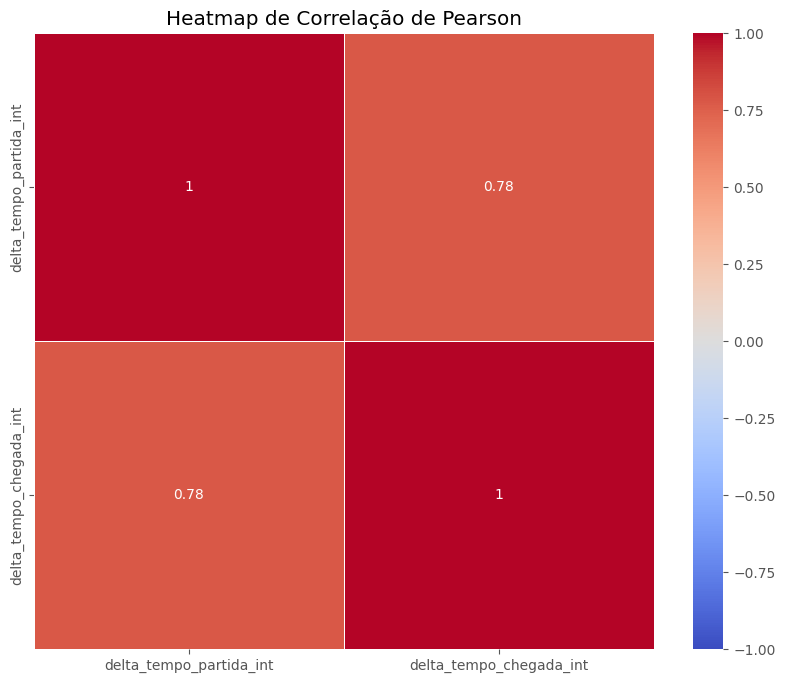

In [32]:
# Exemplo de como usar a função
heatmap_correlacao_pearson(df)

#### Spearman 

In [33]:
def heatmap_correlacao_spearman(df: pd.DataFrame, annot: bool = True, figsize: tuple = (10, 8)):
    """
    Calcula a matriz de correlação de Spearman entre as variáveis numéricas de um DataFrame e
    gera um heatmap para visualização.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    annot : bool, opcional
        Se True, exibe os valores das correlações no heatmap. O padrão é True.
    figsize : tuple, opcional
        Tamanho da figura do heatmap. O padrão é (10, 8).

    Retorna:
    --------
    None
        Exibe o heatmap da correlação de Spearman.
    """
    
    # Selecionar apenas colunas numéricas
    df_numerico = df.select_dtypes(include=['float64', 'int64'])
    
    if df_numerico.empty:
        raise ValueError("Não há colunas numéricas no DataFrame para calcular a correlação.")
    
    # Calcular a matriz de correlação de Spearman
    matriz_correlacao = df_numerico.corr(method='spearman')
    
    # Gerar o heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(matriz_correlacao, annot=annot, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Heatmap de Correlação de Spearman')
    plt.show()

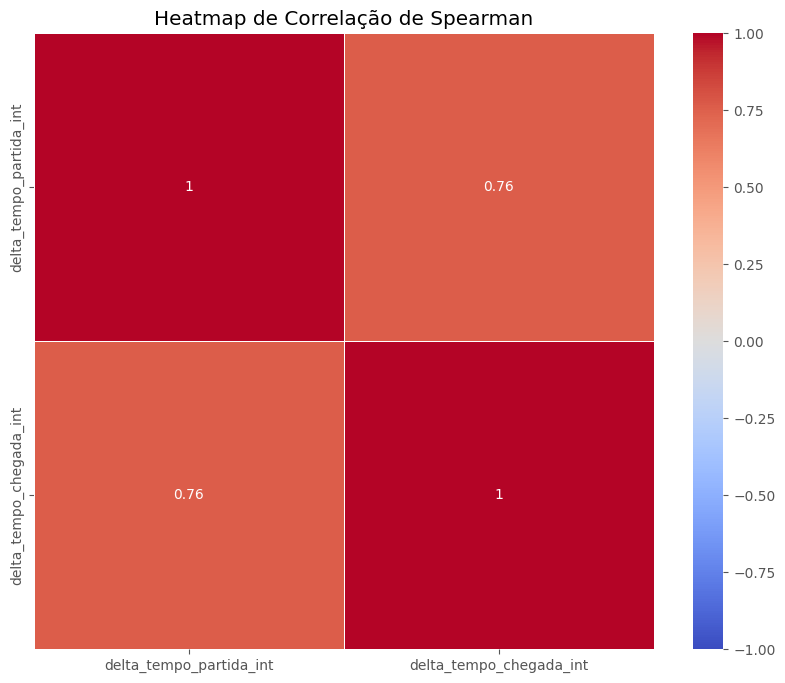

In [34]:
# Exemplo de como usar a função
heatmap_correlacao_spearman(df)

### PCA

In [42]:
def plot_scree_plot(explained_variance, title):
    """
    Cria um gráfico de tela (Scree Plot) para visualizar a variância explicada por cada componente principal.

    Args:
    explained_variance (list): Lista da variância explicada por cada componente principal.
    title (str): Título do gráfico.

    Etapas:
    1. Configurar a figura com tamanho específico.
    2. Criar rótulos para o eixo x correspondendo a cada componente principal.
    3. Plotar a variância explicada em função dos componentes principais.
    4. Adicionar uma linha horizontal representando a regra de Kaiser (média da variância explicada).
    5. Definir rótulos para os eixos x e y, e título do gráfico.
    6. Adicionar legenda e exibir o gráfico.
    """
    plt.figure(figsize=(30, 30))

    # Criando labels para o eixo x
    x_labels = [f'PC{i}' for i in range(1, len(explained_variance) + 1)]

    # Plotando o gráfico
    plt.plot(x_labels, explained_variance, marker='o', linestyle='--')

    # Calculando a média da variância explicada para a regra de Kaiser
    kaiser_rule_threshold = np.mean(explained_variance)

    # Adicionando a linha horizontal para a regra de Kaiser
    plt.axhline(y=kaiser_rule_threshold, color='r', linestyle='dashed', label=f'Kaiser rule (mean={kaiser_rule_threshold:.2f})')

    # Definindo os labels do eixo x
    plt.xticks(x_labels)

    plt.title(f'Scree Plot - {title}')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Explained')

    # Adicionando legenda
    plt.legend()

    plt.show()

def plot_loadings(loadings, title):
    """
    Cria um gráfico de barras para visualizar os pesos (loadings) de cada componente principal.

    Args:
    loadings (DataFrame): DataFrame contendo os pesos dos componentes principais.
    title (str): Título do gráfico.

    Etapas:
    1. Utilizar a função plot do DataFrame para criar um gráfico de barras.
    2. Configurar tamanho, título e rótulos dos eixos.
    3. Exibir o gráfico.
    """
    loadings.plot(kind='bar', figsize=(30, 30))
    plt.title(f'PCA Loadings - {title}')
    plt.ylabel('Loading Value')
    plt.xlabel('Principal Component')
    plt.show()

def plot_loadings_heatmap(loadings, component_labels, variable_labels):
    """
    Cria um mapa de calor para visualizar os pesos (loadings) dos componentes principais em relação às variáveis originais.

    Args:
    loadings (DataFrame): DataFrame contendo os pesos dos componentes principais.
    component_labels (list): Lista de rótulos para os componentes principais.
    variable_labels (list): Lista de rótulos para as variáveis originais.

    Etapas:
    1. Configurar a figura com tamanho específico.
    2. Utilizar a função heatmap do Seaborn para criar o mapa de calor.
    3. Configurar rótulos, título e exibir o gráfico.
    """
    plt.figure(figsize=(30, 30))
    sns.heatmap(loadings, annot=True, cmap='viridis', fmt='.2f',
                yticklabels=component_labels, xticklabels=variable_labels)
    plt.title('PCA Loadings')
    plt.ylabel('Principal Component')
    plt.xlabel('Variable')
    plt.show()

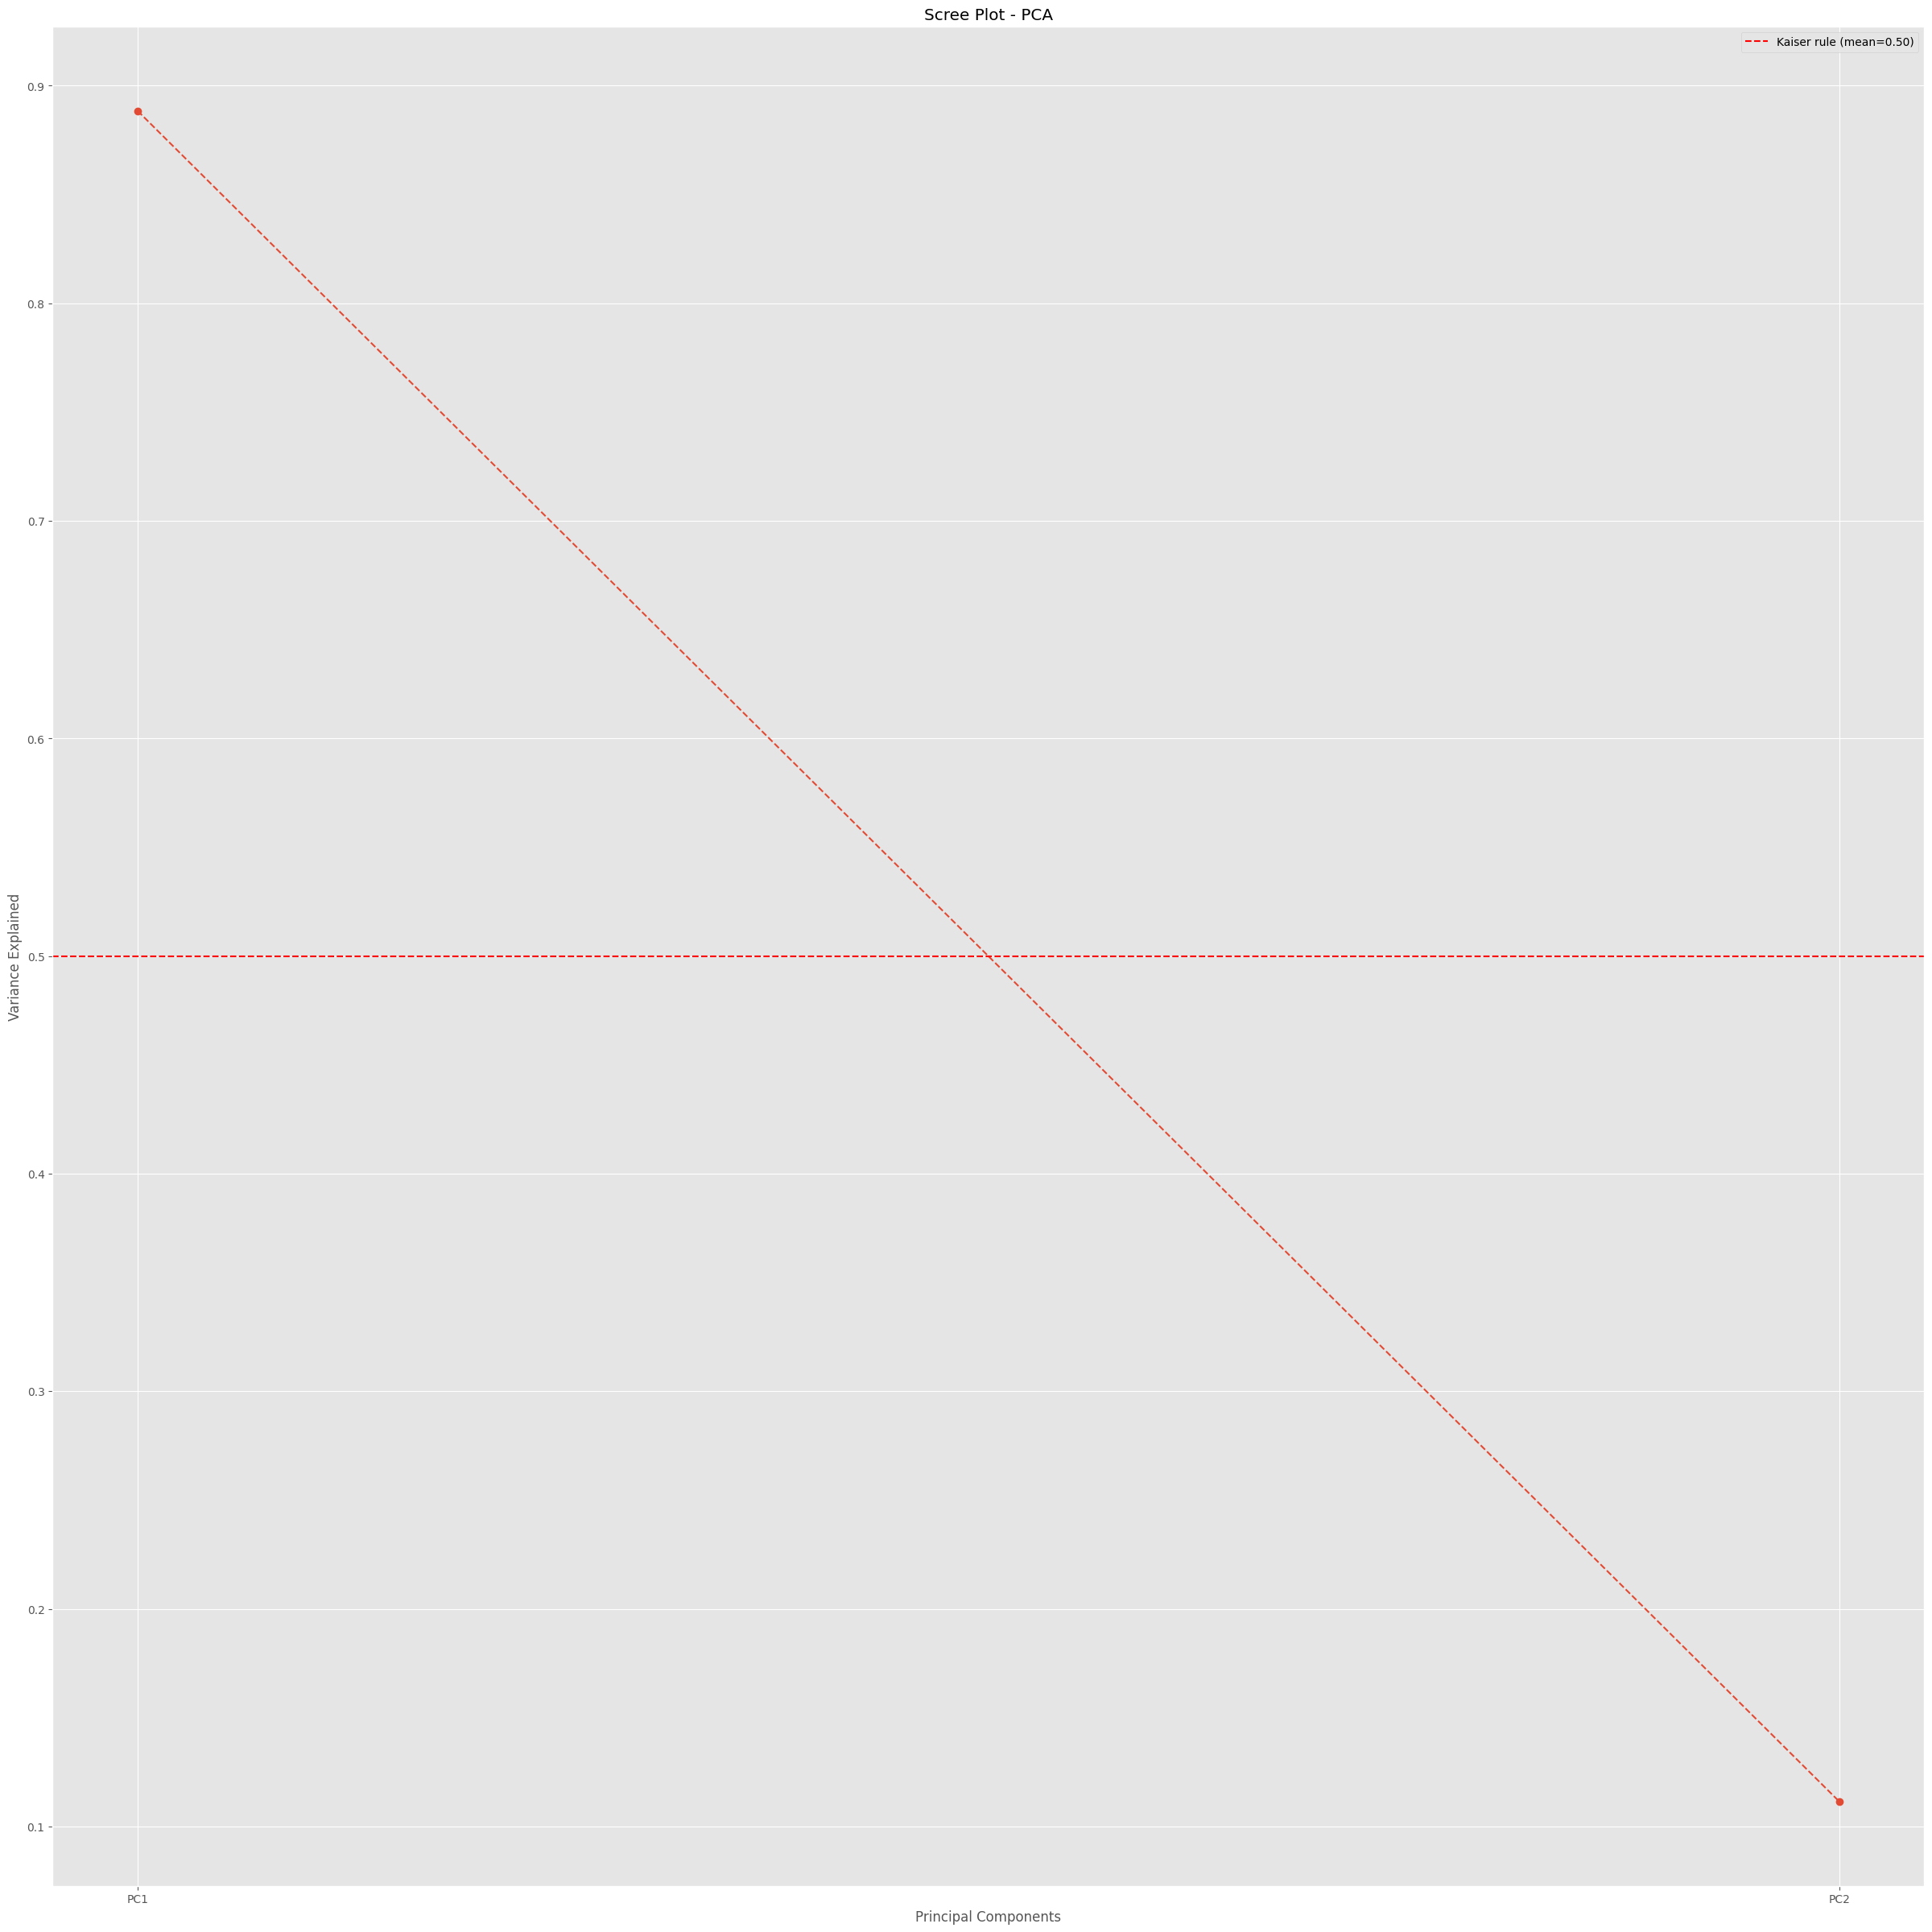

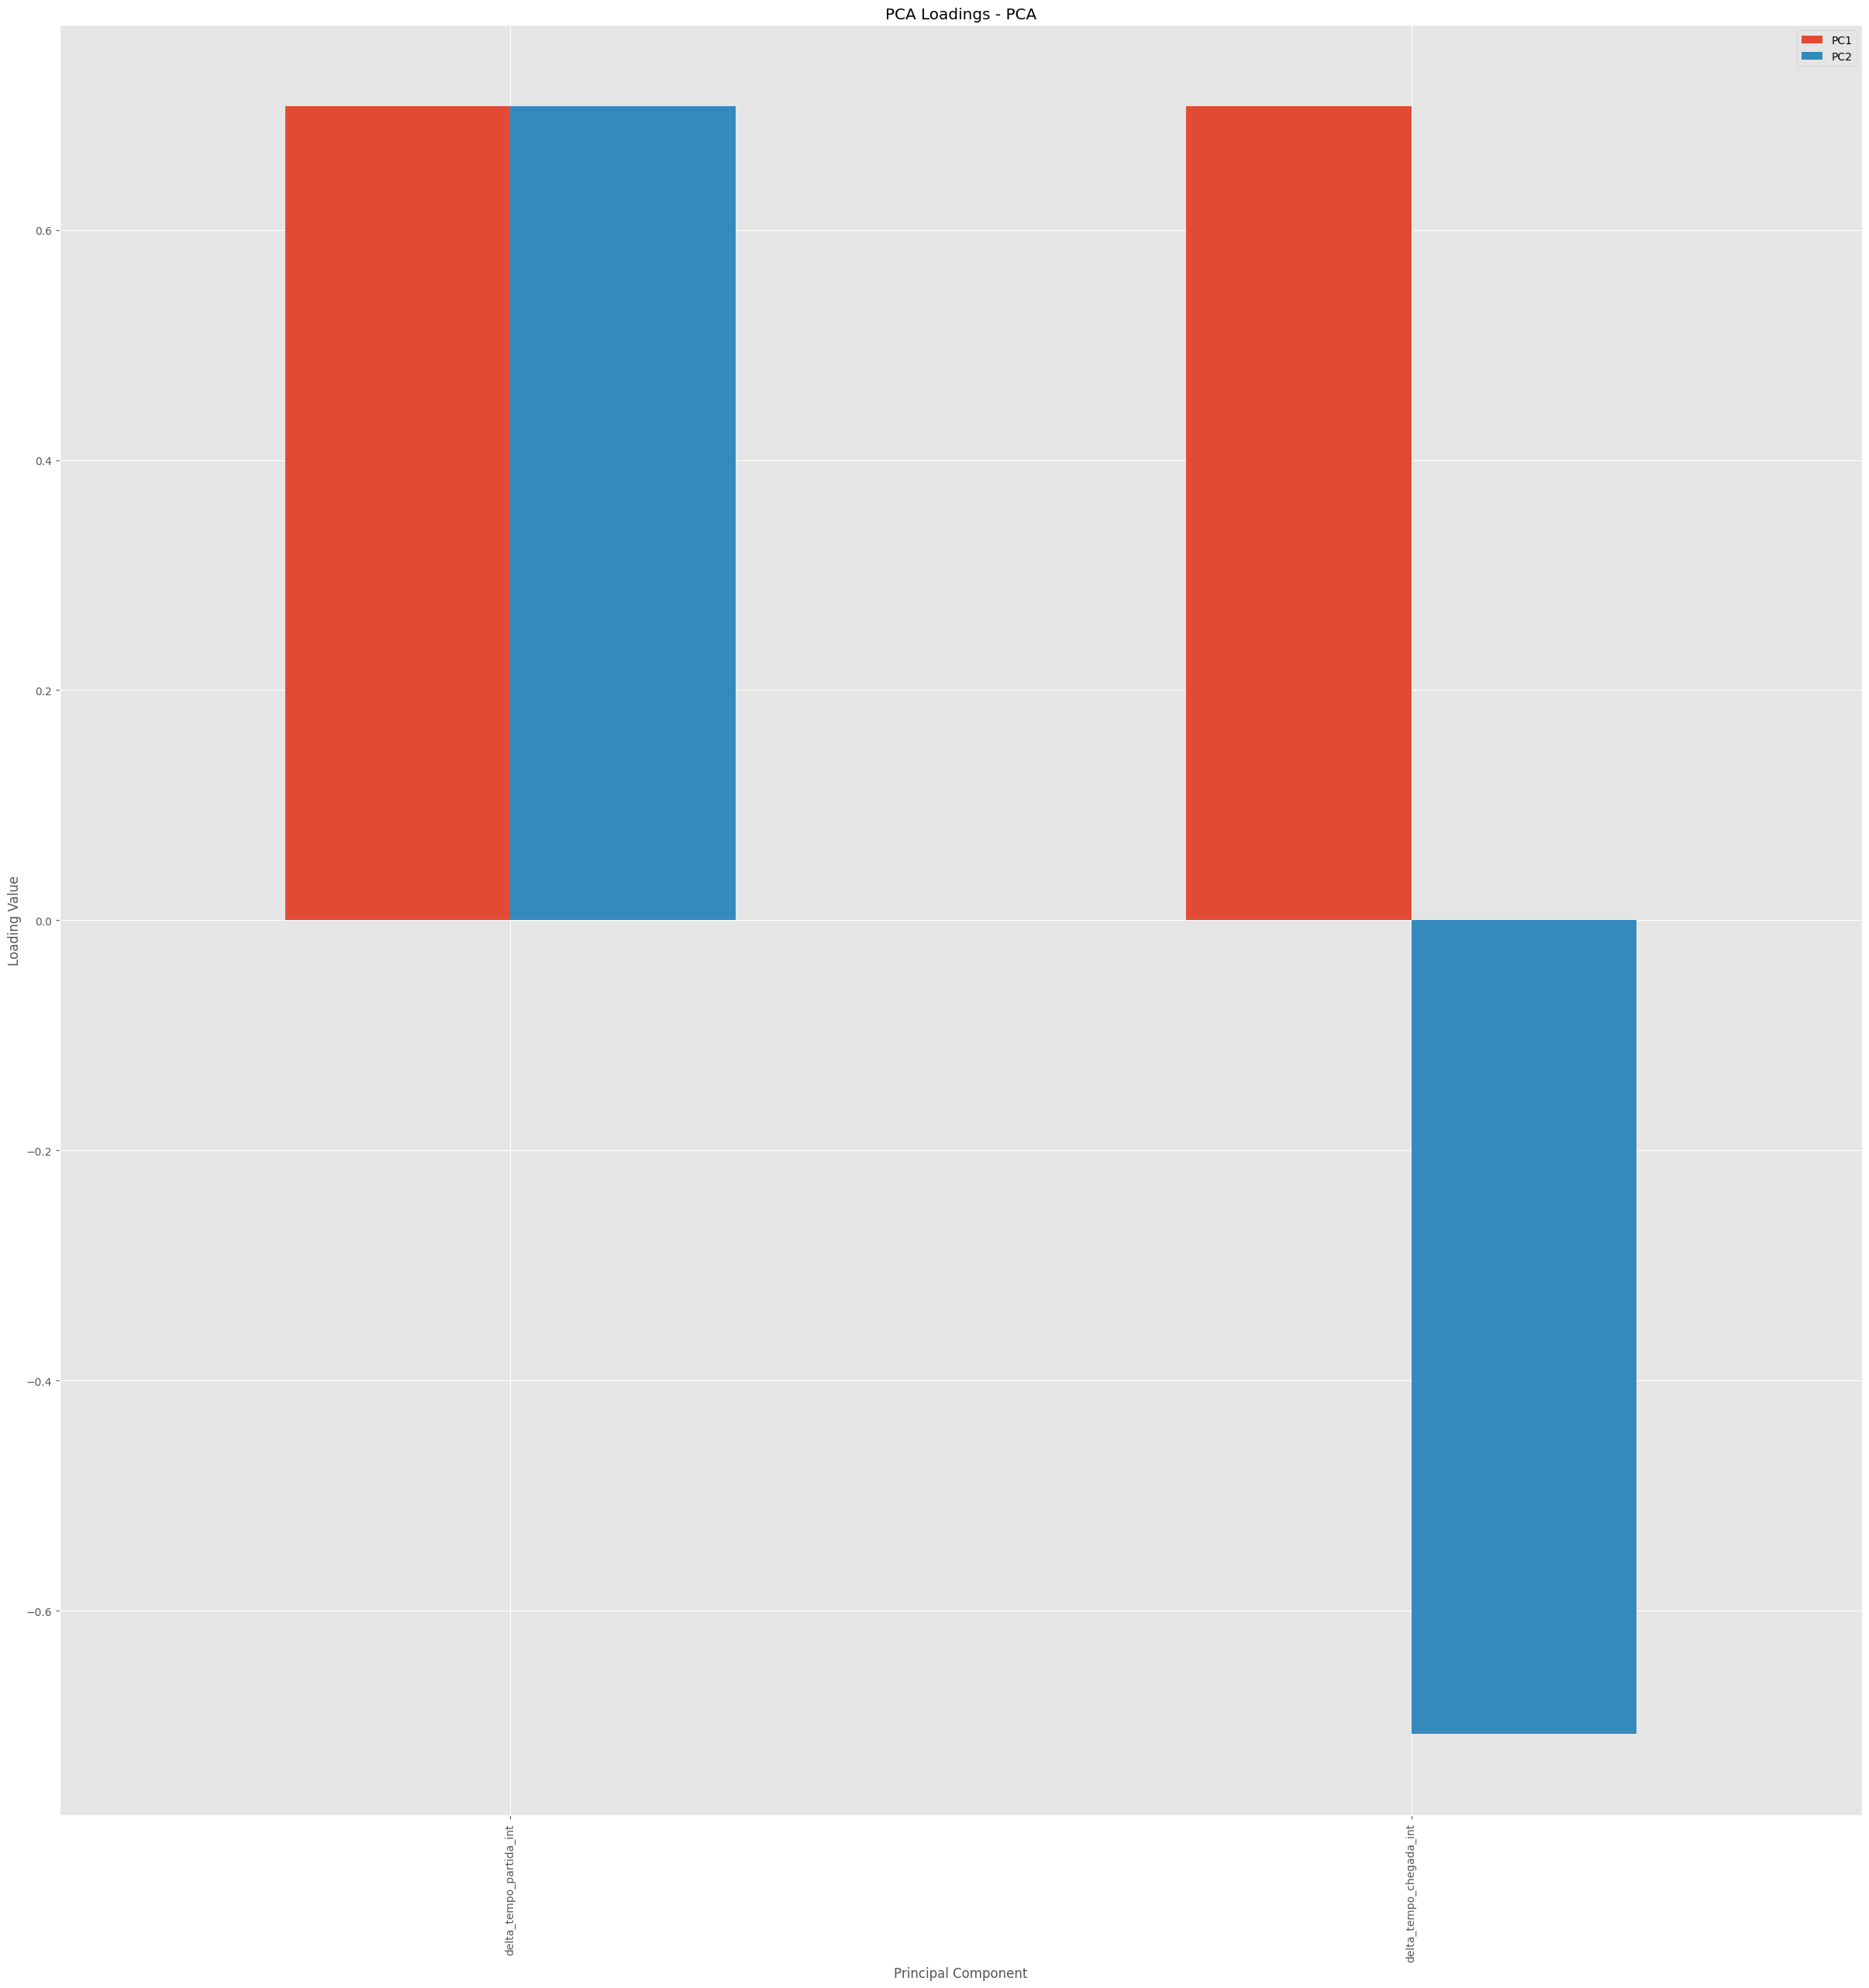

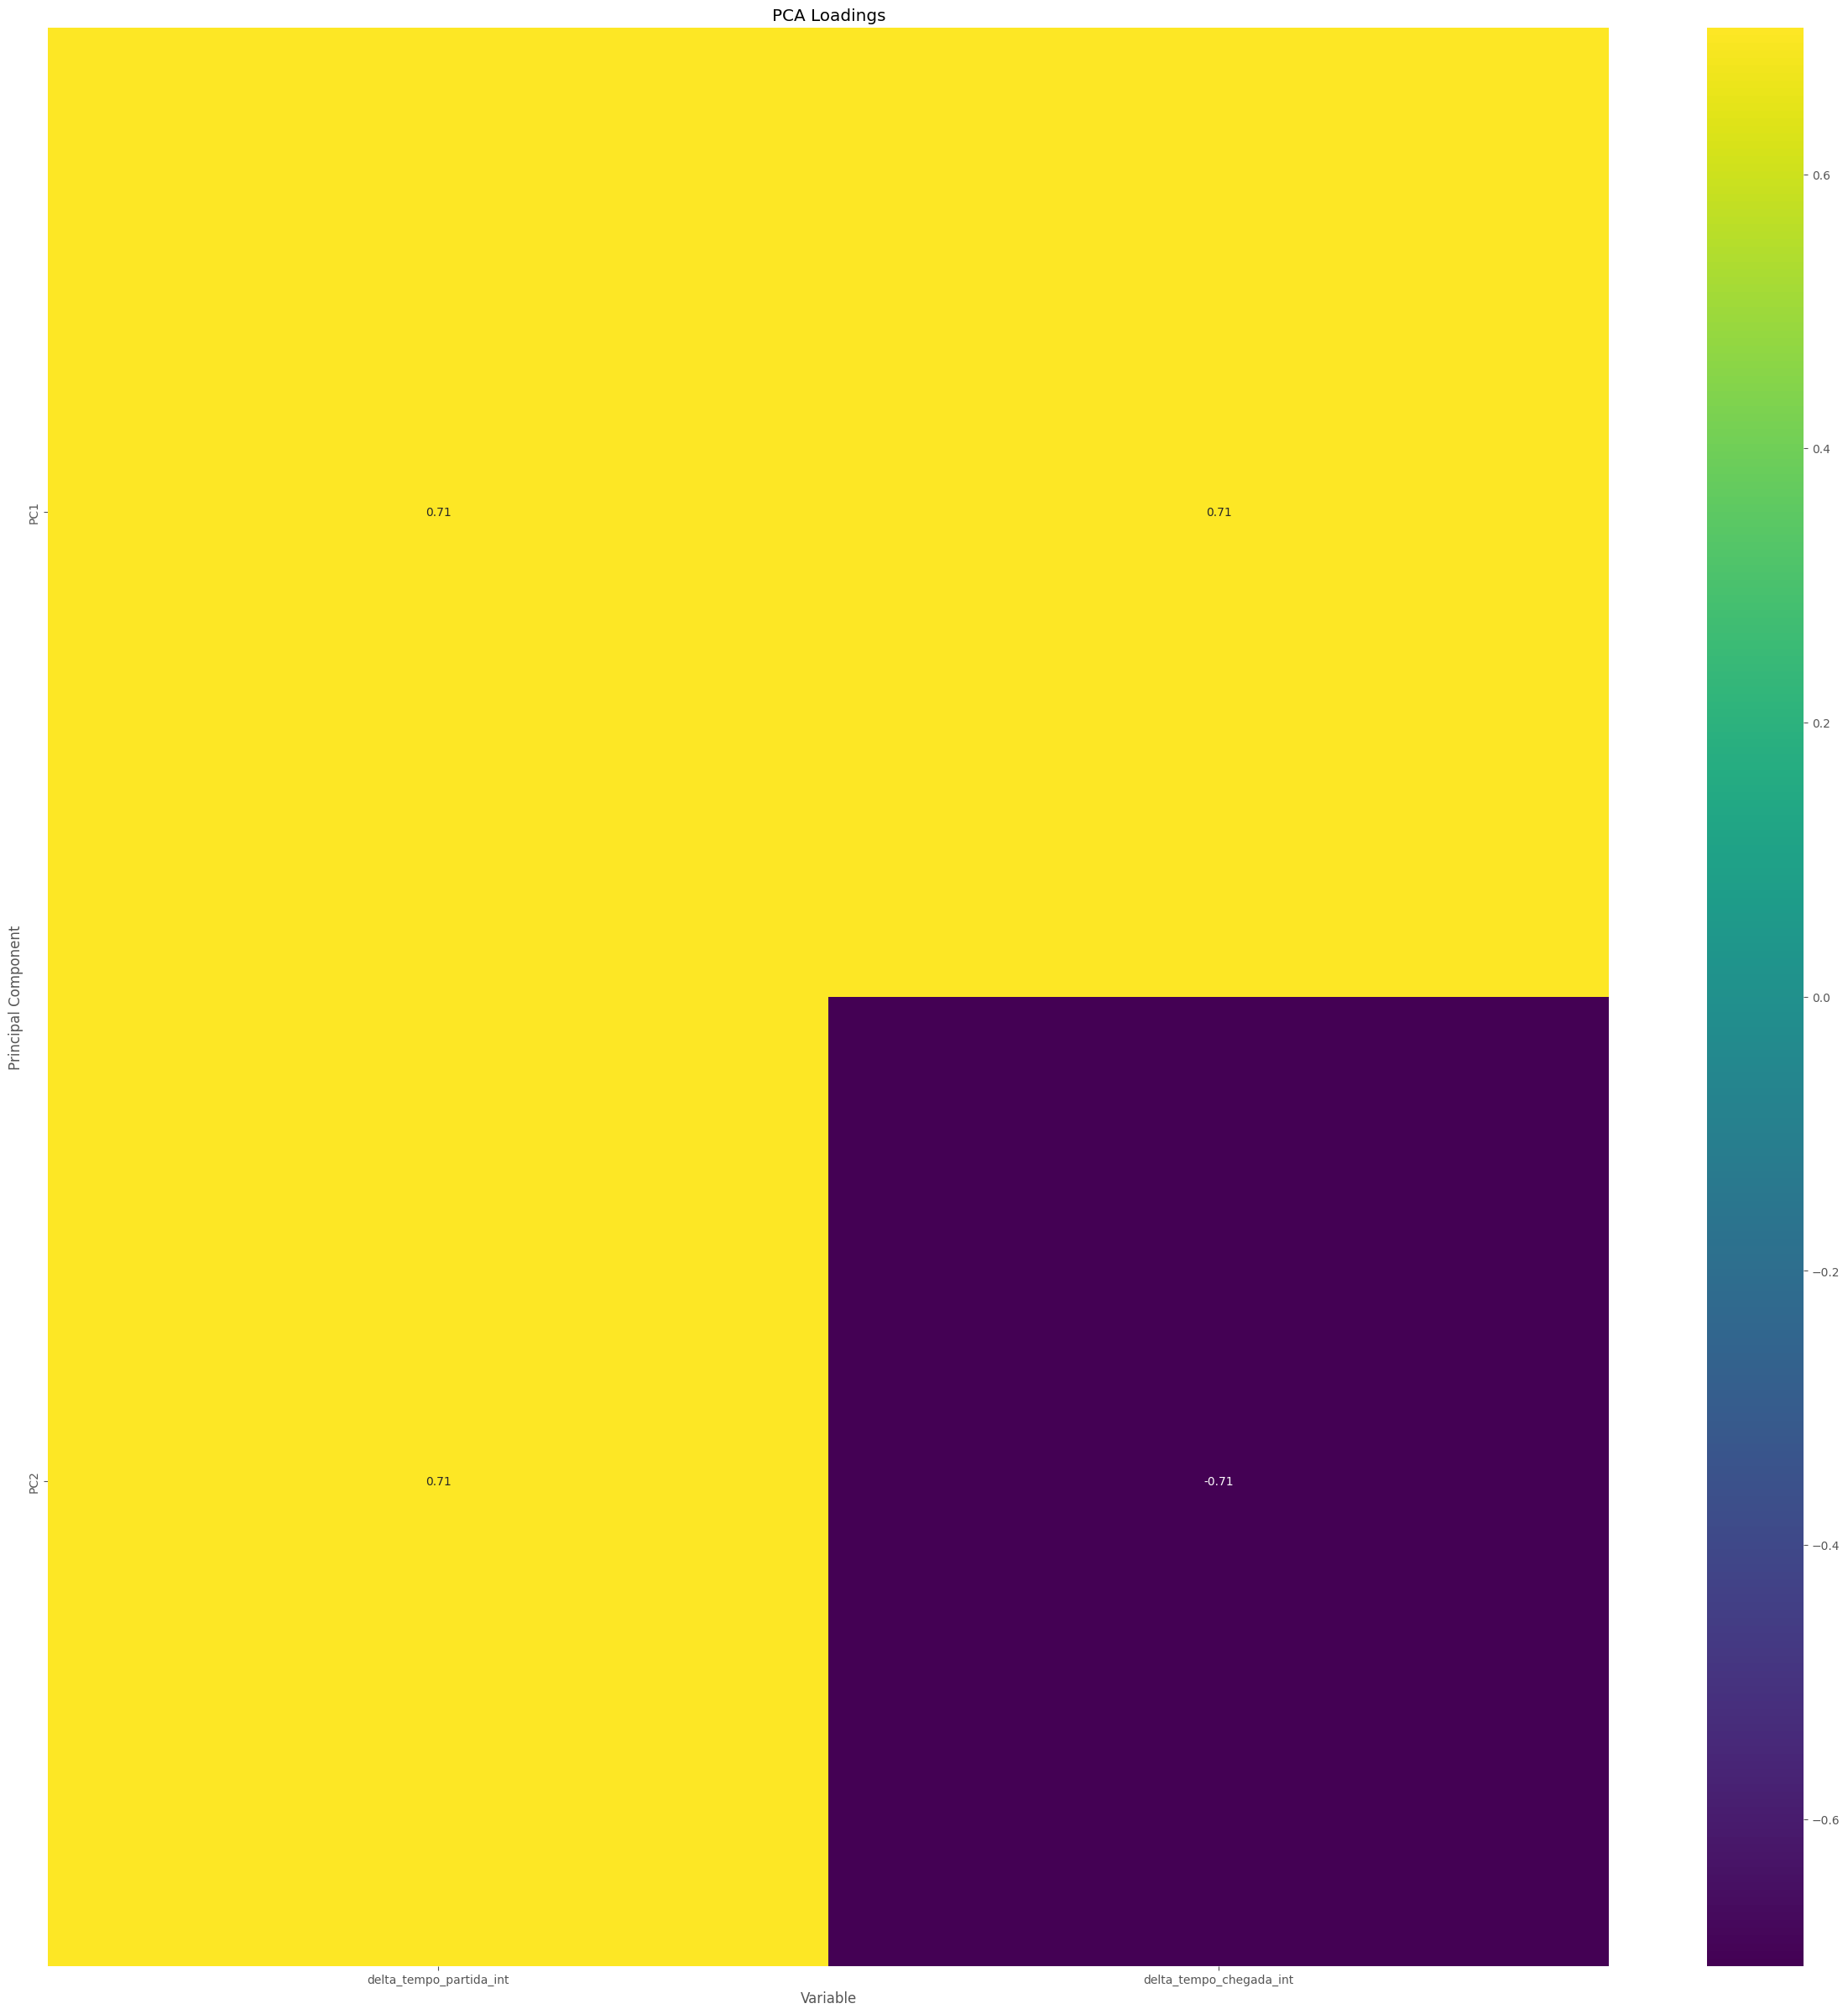

In [45]:
# Substitua 'df' pelo seu DataFrame
# Selecionando colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[colunas_numericas]

# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Aplicando a PCA
pca = PCA()
componentes_principais = pca.fit_transform(df_scaled)

# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Loadings são os coeficientes dos componentes principais
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(df_numeric.columns))], index=df_numeric.columns)

# Agora, chamando as funções para gerar os gráficos
plot_scree_plot(explained_variance, 'PCA')
plot_loadings(loadings, 'PCA')
plot_loadings_heatmap(loadings, loadings.columns, loadings.index)


## Algoritmos

###  Pre-treino para feature selection

In [47]:
df_feature = df[['nome_empresas','codigo_tipo_linha','descricao_origem','descricao_destino','pais_origem','pais_destino','continente_origem',
                 'continente_destino','cidade_origem','cidade_destino','uf_origem','uf_destino','mes_partida','mes_chegada',
                 'dia_semana_partida','dia_semana_chegada','status_do_voo']]

# Seleção das features(variaveis) preditoras
dt_ax = df_feature.drop(columns = ['status_do_voo'])

# Seleção da variavel a ser predita a probabilidade
dt_ay = df_feature[['status_do_voo']].copy()

label_encoder = LabelEncoder()
dt_ay = label_encoder.fit_transform(dt_ay)

list_dummies = ['nome_empresas','codigo_tipo_linha','descricao_origem','descricao_destino','pais_origem','pais_destino','continente_origem',
                 'continente_destino','cidade_origem','cidade_destino','uf_origem','uf_destino','mes_partida','mes_chegada',
                 'dia_semana_partida','dia_semana_chegada']

dt_ax_dummies = pd.get_dummies(dt_ax, columns=list_dummies, dummy_na=True)

# Segmentação em Treino (75%) e Teste (25%)
X_train_hot, X_test_hot, y_train_hot, y_test_hot = train_test_split(dt_ax_dummies, dt_ay, random_state=42, test_size=0.25)

# Segmentação em Treino (75%) e Teste (25%)
X_train, X_test, y_train, y_test = train_test_split(dt_ax, dt_ay, random_state=42, test_size=0.25)

In [48]:
# XGBoost
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_hot,y_train_hot)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
# Catboost
cat_features =  list(dt_ax.select_dtypes(include=['object']))

model_ctb = ctb.CatBoostClassifier( cat_features = cat_features)
model_ctb.fit(dt_ax, dt_ay, cat_features=cat_features, verbose=False)

print('CatBoost model is fitted: ' + str(model_ctb.is_fitted()))

CatBoost model is fitted: True


### PPscore

In [ ]:
%%time
# Calculando e visualizando a matriz de preditividade de poder (Predictive Power Score - PPS).
# PPS é uma alternativa ao coeficiente de correlação de Pearson para medir a relação não linear entre variáveis.
# A pontuação varia de 0 (sem poder preditivo) a 1 (poder preditivo perfeito). Pode ser utilizado como alternativa à correlação (matriz).
df_matrix = pps.matrix(df)

# Criando um mapa de calor com os valores PPS.
# Valores de PPS variam de 0 a 1, onde 1 indica uma relação previsível perfeita entre duas variáveis.
sns.heatmap(df_matrix, vmin=0, vmax=1, annot=True, fmt='.2f', cmap="Blues", linewidths=0.5)

# Sobre o PPScore
# https://research.macrosynergy.com/the-predictive-power-score/
# https://pypi.org/project/ppscore/#:~:text=The%20PPS%20is%20an%20asymmetric,to%20the%20correlation%20(matrix).
# https://machinelearningknowledge.ai/predictive-power-score-vs-correlation-with-python-implementation/

### Recursive Feature Elimination

In [ ]:
def engenharia_de_features_recursiva(modelo, X, y):
    """
    Aplica Recursive Feature Elimination (RFE) para selecionar as melhores features
    de acordo com a importância das variáveis no modelo fornecido.

    Parâmetros:
    -----------
    modelo : objeto do modelo
        O modelo de aprendizado de máquina a ser utilizado (pode ser qualquer modelo com `coef_` ou `feature_importances_`).
    X : pd.DataFrame ou np.array
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        O conjunto de dados com a variável alvo.

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'modelo_rfe': O modelo RFE treinado.
        - 'n_features': O número de features selecionadas.
        - 'suporte': Um array booleano indicando as variáveis selecionadas.
        - 'ranking': O ranking das variáveis.
        - 'colunas_selecionadas': As colunas do DataFrame X que foram selecionadas.
    """
    
    # Aplicando RFE no modelo fornecido
    rfe = RFE(modelo)
    rfe_fit = rfe.fit(X, y)
    
    # Criando um dicionário com os resultados
    resultados_rfe = {
        'modelo_rfe': rfe_fit,
        'n_features': rfe_fit.n_features_,
        'suporte': rfe_fit.support_,
        'ranking': rfe_fit.ranking_,
        'colunas_selecionadas': X.columns[rfe_fit.support_].tolist()
    }
    
    return resultados_rfe

In [ ]:
# Exemplo de uso da função
resultado_rfe = engenharia_de_features_recursiva(model_xgb, X_train_hot, y_train_hot)

# Acessando as colunas significativas
colunas_significativas_rfe = resultado_rfe['colunas_selecionadas']

In [ ]:
colunas_significativas_rfe

In [ ]:
## RFE Catboost
rfe_dict = model_ctb.select_features(X = dt_ax, 
                                     y = dt_ay, 
                                     features_for_select = '0-15',
                                     num_features_to_select = 15,
                                     steps = 2,
                                     train_final_model = False,
                                     plot = True)

### Select From model

In [ ]:
def selecao_variaveis_modelo(modelo, X_train, y_train, X_test, y_test, metric_func, metric_name="Metric", alpha=0.90) -> list:
    """
    Realiza a seleção de variáveis com base na importância das features de um modelo CatBoost, LightGBM ou XGBoost.
    Para cada limiar de importância, treina um modelo e avalia a métrica especificada.

    Parâmetros:
    -----------
    modelo : objeto treinado (CatBoost, LightGBM ou XGBoost)
        O modelo já treinado (de qualquer uma das três bibliotecas suportadas).
    X_train : pd.DataFrame ou np.array
        O conjunto de treino com as variáveis preditoras.
    y_train : pd.Series ou np.array
        O conjunto de treino com a variável alvo.
    X_test : pd.DataFrame ou np.array
        O conjunto de teste com as variáveis preditoras.
    y_test : pd.Series ou np.array
        O conjunto de teste com a variável alvo.
    metric_func : function
        A função de métrica que será usada para avaliar o modelo (ex.: accuracy_score, f1_score).
    metric_name : str, opcional
        O nome da métrica, usado para impressão no output. O padrão é 'Metric'.
    alpha : float, opcional
        O limiar de desempenho acima do qual as variáveis selecionadas serão retornadas. O padrão é 0.90.

    Retorna:
    --------
    list
        Uma lista contendo os nomes ou índices das variáveis mais importantes selecionadas pelo modelo.
    """

    # Obter importâncias das features do modelo
    if hasattr(modelo, "feature_importances_"):
        feature_importances = modelo.feature_importances_
    elif hasattr(modelo, "get_feature_importance"):
        feature_importances = modelo.get_feature_importance()
    else:
        raise ValueError("O modelo fornecido não suporta a obtenção de importâncias das features.")

    # Previsões iniciais e avaliação
    predictions = modelo.predict(X_test)
    metric_value = metric_func(y_test, predictions)
    print(f"{metric_name} inicial: {metric_value:.2f}")

    # Ordenar as importâncias das features
    thresholds = np.sort(feature_importances)
    
    variaveis_selecionadas = []
    
    # Iterar por cada limiar de importância
    for thresh in thresholds:
        # Selecionar features usando o limiar atual
        selection = SelectFromModel(modelo, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)

        # Verificar se o modelo é do tipo CatBoost, LightGBM ou XGBoost e treinar o modelo adequado
        if isinstance(modelo, xgb.XGBClassifier):
            selection_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbose=False)
        elif isinstance(modelo, lgb.LGBMClassifier):
            selection_model = lgb.LGBMClassifier()
        elif isinstance(modelo, catboost.CatBoostClassifier):
            selection_model = catboost.CatBoostClassifier(verbose=0)
        else:
            raise ValueError("O modelo fornecido não é suportado. Use CatBoost, LightGBM ou XGBoost.")

        # Treinar o modelo com as features selecionadas
        selection_model.fit(select_X_train, y_train)

        # Avaliar o modelo com as features selecionadas
        select_X_test = selection.transform(X_test)
        predictions = selection_model.predict(select_X_test)
        metric_value = metric_func(y_test, predictions)
        print(f"Thresh={thresh:.3f}, n={select_X_train.shape[1]}, {metric_name}: {metric_value:.2f}")

        # Se a métrica com o limiar atual for boa, armazenar as variáveis
        if metric_value > alpha:
            variaveis_selecionadas.append(select_X_train)

    return variaveis_selecionadas

In [ ]:
variaveis_importantes_xgb = selecao_variaveis_modelo(model_xgb, X_train_hot, y_train_hot, X_test_hot, y_test_hot, accuracy_score, "Acurácia")

In [ ]:
variaveis_importantes_xgb

### Feature Importance

In [ ]:
fig, ax = plt.subplots(figsize=(5,7))
xgb.plot_importance(model_xgb, max_num_features=30, height=0.8, ax=ax)
plt.show()

In [ ]:
feature_importance = model_ctb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance CatBoost')

### Permutation Importance

In [ ]:
perm_importance = permutation_importance(model_xgb, X_test_hot, y_test_hot, n_repeats=10, random_state=123)

top_n = 25
# Ordenando as características pela importância e selecionando as top_n
sorted_idx = perm_importance.importances_mean.argsort()[-top_n:]

# Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))  # Ajuste o tamanho conforme necessário
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')

# Definindo os y-ticks para serem os nomes das características
plt.yticks(range(len(sorted_idx)), np.array(X_test_hot.columns)[sorted_idx])

# Título do gráfico
plt.title('Top {} Features Permutation Importance'.format(top_n))

# Layout apertado para arranjo visual limpo
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [ ]:
perm_importance = permutation_importance(model_ctb, X_test, y_test, n_repeats=10, random_state=123)
sorted_idx = perm_importance.importances_mean.argsort()
#fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

### Shap

In [ ]:
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_test_hot)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(22, 21))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test_hot.columns)[sorted_idx])
#plt.title('SHAP Importance')
shap.plots.bar(shap_values, max_display=50)

In [ ]:
explainer = shap.Explainer(model_ctb)
shap_values = explainer(dt_ax)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(7, 7))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(dt_ax.columns)[sorted_idx])
plt.title('SHAP Importance')

### Sequential forward selection (SFS)

In [ ]:
def selecao_sequencial_de_features(modelo, X, y, n_features_to_select=None, direction='forward', scoring=None, cv=5, n_jobs=None):
    """
    Aplica o Sequential Feature Selector para selecionar as melhores variáveis preditoras
    de acordo com a métrica de avaliação fornecida.

    Parâmetros:
    -----------
    modelo : objeto do modelo
        O modelo de aprendizado de máquina a ser utilizado para a seleção de variáveis.
    X : pd.DataFrame ou np.array
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        O conjunto de dados com a variável alvo.
    n_features_to_select : int ou None, opcional
        O número de features a serem selecionadas. Se None, metade das features são selecionadas.
    direction : str, opcional
        A direção da seleção: 'forward' para Forward Selection, 'backward' para Backward Selection.
        O padrão é 'forward'.
    scoring : str ou callable, opcional
        A métrica de avaliação a ser usada. Aceita qualquer métrica compatível com o scikit-learn.
        Se None, usa o score padrão do estimador.
    cv : int, cross-validation generator ou um iterável, opcional
        Determina a estratégia de cross-validation. O padrão é 5.
    n_jobs : int ou None, opcional
        O número de jobs a serem executados em paralelo. None significa 1, -1 significa usar todos os processadores.

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'sfs_fit': O objeto SequentialFeatureSelector treinado.
        - 'colunas_selecionadas': As colunas selecionadas do DataFrame X.
        - 'suporte': Um array booleano indicando as variáveis selecionadas.
        - 'ranking': O ranking das variáveis (1 para selecionadas).
    """

    # Validar parâmetros de entrada
    if direction not in ['forward', 'backward']:
        raise ValueError("O parâmetro 'direction' deve ser 'forward' ou 'backward'.")

    # Clonar o modelo para evitar alterações no modelo original
    modelo_clone = clone(modelo)

    # Inicializar o SequentialFeatureSelector
    sfs = SequentialFeatureSelector(
        estimator=modelo_clone,
        n_features_to_select=n_features_to_select,
        direction=direction,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs
    )

    # Ajustar o SequentialFeatureSelector aos dados
    sfs.fit(X, y)

    # Obter as colunas selecionadas
    colunas_selecionadas = X.columns[sfs.get_support()].tolist()

    # Criar um dicionário com os resultados
    resultados_sfs = {
        'sfs_fit': sfs,
        'colunas_selecionadas': colunas_selecionadas,
        'suporte': sfs.get_support(),
        'ranking': sfs.get_support().astype(int)  # 1 para selecionadas, 0 para não selecionadas
    }

    return resultados_sfs

In [ ]:
selecao_sequencial_de_features(model_xgb, X_train_hot, y_train_hot)
colunas_selecionadas_sfs = resultado_sfs['colunas_selecionadas']
print(f"Colunas Selecionadas: {colunas_selecionadas_sfs}")

### Sequential backward selection (SBS)

In [ ]:
selecao_sequencial_de_features(model_xgb, X_train_hot, y_train_hot,direction='backward')
colunas_selecionadas_sfs = resultado_sfs['colunas_selecionadas']
print(f"Colunas Selecionadas: {colunas_selecionadas_sfs}")

### Boruta

In [ ]:
def selecao_de_variaveis_boruta(X: pd.DataFrame, y, estimador=None, perc: int = 100, alpha: float = 0.05, max_iter: int = 100, random_state: int = None) -> dict:
    """
    Aplica o algoritmo Boruta para selecionar as variáveis mais importantes de um conjunto de dados.

    Parâmetros:
    -----------
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        A variável alvo.
    estimador : RandomForestClassifier ou RandomForestRegressor, opcional
        O estimador usado pelo Boruta. Se None, um RandomForest apropriado será criado.
    perc : int, opcional
        Percentil usado para calcular o limiar de importância das features (padrão é 100).
    alpha : float, opcional
        Nível de significância estatística usado pelo algoritmo (padrão é 0.05).
    max_iter : int, opcional
        Número máximo de iterações para o algoritmo Boruta (padrão é 100).
    random_state : int, opcional
        Semente para geração de números aleatórios.

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'colunas_selecionadas': Lista das colunas selecionadas.
        - 'colunas_tentativas': Lista das colunas marcadas como tentativas.
        - 'colunas_rejeitadas': Lista das colunas rejeitadas.
        - 'ranking': Ranking completo das variáveis.
        - 'importancias': Importâncias das variáveis conforme calculado pelo Boruta.

    Exceções:
    ---------
    ValueError:
        Se o estimador fornecido não for um RandomForestClassifier ou RandomForestRegressor.
    """

    # Verificar se o estimador foi fornecido, caso contrário criar um padrão
    if estimador is None:
        if pd.api.types.is_numeric_dtype(y):
            estimador = RandomForestRegressor(n_estimators=100, random_state=random_state, n_jobs=-1)
        else:
            estimador = RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1)
    else:
        if not isinstance(estimador, (RandomForestClassifier, RandomForestRegressor)):
            raise ValueError("O estimador deve ser RandomForestClassifier ou RandomForestRegressor.")

    # Converter y para numpy array se não for
    if isinstance(y, pd.Series):
        y_array = y.values.ravel()
    elif isinstance(y, np.ndarray):
        y_array = y.ravel()
    else:
        y_array = np.array(y).ravel()

    # Inicializar o Boruta
    boruta_selector = BorutaPy(
        estimator=estimador,
        n_estimators='auto',
        perc=perc,
        alpha=alpha,
        max_iter=max_iter,
        random_state=random_state,
        verbose=0
    )

    # Ajustar o Boruta ao conjunto de dados
    boruta_selector.fit(X.values, y_array)

    # Obter as colunas selecionadas, tentativas e rejeitadas
    colunas_selecionadas = X.columns[boruta_selector.support_].tolist()
    colunas_tentativas = X.columns[boruta_selector.support_weak_].tolist()
    colunas_rejeitadas = [col for col in X.columns if col not in colunas_selecionadas + colunas_tentativas]

    # Criar o ranking completo das variáveis
    ranking = pd.Series(boruta_selector.ranking_, index=X.columns).sort_values()

    # Obter as importâncias das variáveis
    importancias = pd.Series(boruta_selector.importances_mean_, index=X.columns)

    # Retornar os resultados em um dicionário
    resultados_boruta = {
        'colunas_selecionadas': colunas_selecionadas,
        'colunas_tentativas': colunas_tentativas,
        'colunas_rejeitadas': colunas_rejeitadas,
        'ranking': ranking,
        'importancias': importancias
    }

    return resultados_boruta

In [ ]:
# Aplicando a seleção de variáveis com Boruta
resultados_boruta = selecao_de_variaveis_boruta(X_train_hot, y_train_hot, random_state=42)

# Acessando as colunas selecionadas
colunas_selecionadas = resultados_boruta['colunas_selecionadas']
print("Colunas Selecionadas:")
print(colunas_selecionadas)

# Acessando o ranking das variáveis
print("\nRanking das Variáveis:")
print(resultados_boruta['ranking'])

# Acessando as importâncias das variáveis
print("\nImportâncias das Variáveis:")
print(resultados_boruta['importancias'])

### Mutual Information (MI)

In [ ]:
def variaveis_significativas_mi(df: pd.DataFrame, y: str, problem_type: str = 'classification', n_features: int = None) -> pd.DataFrame:
    """
    Calcula a Informação Mútua (Mutual Information) entre as variáveis preditoras e a variável alvo.
    Retorna um DataFrame ordenado com as variáveis e seus respectivos scores de MI.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (alvo) no DataFrame.
    problem_type : str, opcional
        O tipo de problema: 'classification' para classificação ou 'regression' para regressão. Padrão é 'classification'.
    n_features : int, opcional
        O número de features a serem selecionadas. Se None, retorna todas as features com seus scores.

    Retorna:
    --------
    pd.DataFrame
        DataFrame contendo as variáveis preditoras e seus respectivos scores de Informação Mútua, ordenado do maior para o menor.

    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame ou se 'problem_type' for inválido.
    """
    # Verificar se a variável alvo está no DataFrame
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    # Separar as variáveis preditoras e a variável alvo
    X = df.drop(columns=[y])
    y_data = df[y]

    # Converter variáveis categóricas para numéricas
    X_encoded = X.copy()
    for col in X_encoded.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

    # Converter a variável alvo se for categórica e problema de classificação
    if problem_type == 'classification':
        if y_data.dtype == 'object' or y_data.dtype.name == 'category':
            y_encoded = LabelEncoder().fit_transform(y_data)
        else:
            y_encoded = y_data
        # Calcular a Informação Mútua para classificação
        mi_scores = mutual_info_classif(X_encoded, y_encoded, discrete_features='auto')
    elif problem_type == 'regression':
        y_encoded = y_data
        # Calcular a Informação Mútua para regressão
        mi_scores = mutual_info_regression(X_encoded, y_encoded, discrete_features='auto')
    else:
        raise ValueError("O parâmetro 'problem_type' deve ser 'classification' ou 'regression'.")

    # Criar DataFrame com os resultados
    mi_df = pd.DataFrame({
        'Variável': X.columns,
        'Score_MI': mi_scores
    })

    # Ordenar do maior para o menor score
    mi_df = mi_df.sort_values(by='Score_MI', ascending=False).reset_index(drop=True)

    # Selecionar as top n_features, se especificado
    if n_features is not None:
        mi_df = mi_df.head(n_features)

    return mi_df


In [ ]:
# Para um problema de classificação
mi_resultado = variaveis_significativas_mi(df, 'status_do_voo', problem_type='classification')

# Exibindo as variáveis mais significativas
print(mi_resultado)

# Se quiser selecionar apenas as top 10 variáveis
mi_top10 = variaveis_significativas_mi(df, 'status_do_voo', problem_type='classification', n_features=10)
print(mi_top10)

### ReliefF

In [ ]:
def selecao_de_variaveis_relieff(X: pd.DataFrame, y, n_neighbors: int = 10) -> pd.DataFrame:
    """
    Implementa o algoritmo ReliefF para a seleção de variáveis.

    Parâmetros:
    -----------
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        A variável alvo.
    n_neighbors : int, opcional
        Número de vizinhos a serem considerados pelo algoritmo (padrão é 10).

    Retorna:
    --------
    pd.DataFrame
        DataFrame contendo as variáveis preditoras e seus respectivos scores de relevância, ordenado do maior para o menor.

    Exceções:
    ---------
    ValueError:
        Se 'X' não for um DataFrame ou se 'y' não for uma Série ou array do NumPy.
    """
    # Verificar se X é um DataFrame
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")

    # Verificar se y é uma Série ou array
    if not isinstance(y, (pd.Series, np.ndarray)):
        raise ValueError("O parâmetro 'y' deve ser uma Série do pandas ou um array do NumPy.")

    # Copiar X para evitar alterações no original
    X_copy = X.copy()

    # Codificar variáveis categóricas em X
    for col in X_copy.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        X_copy[col] = le.fit_transform(X_copy[col].astype(str))

    # Converter X para array NumPy
    X_array = X_copy.values

    # Codificar a variável alvo se for categórica
    if y.dtype.kind in {'O', 'b', 'c', 'S', 'U'} or isinstance(y[0], str):
        y_encoded = LabelEncoder().fit_transform(y)
    else:
        y_encoded = y

    # Obter classes únicas e número de classes
    classes = np.unique(y_encoded)
    n_classes = len(classes)

    # Inicializar o vetor de pesos das features
    n_features = X_array.shape[1]
    weights = np.zeros(n_features)

    # Construir a árvore KD para encontrar vizinhos próximos
    tree = KDTree(X_array)

    # Iterar sobre cada instância
    for idx, (instance, label) in enumerate(zip(X_array, y_encoded)):
        # Encontrar os n_neighbors mais próximos
        distances, indices = tree.query([instance], k=n_neighbors + 1)
        neighbor_indices = indices[0][1:]  # Exclui a própria instância

        # Inicializar contadores
        hit_counts = np.zeros(n_classes)
        miss_counts = np.zeros(n_classes)

        # Calcular as contribuições de hits e misses
        for neighbor_idx in neighbor_indices:
            neighbor_label = y_encoded[neighbor_idx]
            if neighbor_label == label:
                hit_counts[label] += 1
            else:
                miss_counts[neighbor_label] += 1

        # Atualizar pesos das features
        for neighbor_idx in neighbor_indices:
            neighbor_label = y_encoded[neighbor_idx]
            diff = np.abs(instance - X_array[neighbor_idx])

            if neighbor_label == label:
                weights -= diff / (n_neighbors)
            else:
                weights += diff / (n_neighbors * (n_classes - 1))

    # Normalizar pesos para o intervalo [0, 1]
    min_weight = np.min(weights)
    max_weight = np.max(weights)
    if max_weight - min_weight != 0:
        weights = (weights - min_weight) / (max_weight - min_weight)
    else:
        weights = np.zeros_like(weights)

    # Criar DataFrame com os resultados
    relieff_scores = pd.DataFrame({
        'Variável': X_copy.columns,
        'Score_ReliefF': weights
    })

    # Ordenar do maior para o menor score
    relieff_scores = relieff_scores.sort_values(by='Score_ReliefF', ascending=False).reset_index(drop=True)

    return relieff_scores

In [ ]:
# Separando as variáveis preditoras e a variável alvo
X = df.drop(columns=['status_do_voo'])
y = df['status_do_voo']

# Aplicando a função de seleção de variáveis com ReliefF
relieff_resultado = selecao_de_variaveis_relieff(X, y, n_neighbors=10)

# Exibindo as variáveis mais significativas
print(relieff_resultado)

### Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
def selecao_de_variaveis_variance_threshold(X: pd.DataFrame, threshold: float = 0.0) -> pd.DataFrame:
    """
    Aplica o método Variance Threshold para selecionar variáveis com base na variância.

    Parâmetros:
    -----------
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    threshold : float, opcional
        O limiar de variância. Features com variância abaixo desse valor serão removidas.
        O padrão é 0.0, que remove features com o mesmo valor em todas as amostras.

    Retorna:
    --------
    pd.DataFrame
        DataFrame contendo apenas as variáveis que possuem variância acima do limiar especificado.

    Exceções:
    ---------
    ValueError:
        Se 'X' não for um DataFrame ou se todas as features forem removidas devido ao limiar.

    Exemplo de Uso:
    ---------------
    >>> X_selecionado = selecao_de_variaveis_variance_threshold(X, threshold=0.1)
    >>> print("Variáveis selecionadas:", X_selecionado.columns.tolist())
    """
    # Verificar se X é um DataFrame
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")

    # Copiar X para não alterar o original
    X_processed = X.copy()

    # Identificar colunas não numéricas
    cols_categoricas = X_processed.select_dtypes(include=['object', 'category']).columns

    # Codificar variáveis categóricas
    if cols_categoricas.any():
        X_processed = pd.get_dummies(X_processed, columns=cols_categoricas, drop_first=False, dummy_na=True)

    # Aplicar o Variance Threshold
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X_processed)

    # Obter as colunas que foram selecionadas
    features_selecionadas = X_processed.columns[selector.get_support(indices=True)]

    # Verificar se alguma feature foi selecionada
    if X_selected.shape[1] == 0:
        raise ValueError("Nenhuma variável foi selecionada. Considere diminuir o valor do 'threshold'.")

    # Retornar o DataFrame com as features selecionadas
    X_selecionado = pd.DataFrame(X_selected, columns=features_selecionadas, index=X.index)

    return X_selecionado

In [ ]:
# Supondo que 'df' seja o seu DataFrame original
X_selecionado = selecao_de_variaveis_variance_threshold(df, threshold=0.0)

print("\nDataFrame com Variáveis Selecionadas:")
print(X_selecionado)
print("\nVariáveis selecionadas:", X_selecionado.columns.tolist())

### Information Gain

In [ ]:
def variaveis_significativas_information_gain(df: pd.DataFrame, y: str) -> pd.DataFrame:
    """
    Calcula o Ganho de Informação (Information Gain) entre as variáveis preditoras e a variável alvo.
    Retorna um DataFrame ordenado com as variáveis e seus respectivos scores de Information Gain.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (alvo) no DataFrame.

    Retorna:
    --------
    pd.DataFrame
        DataFrame contendo as variáveis preditoras e seus respectivos scores de Information Gain, ordenado do maior para o menor.

    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não estiver presente no DataFrame.
    """
    # Verificar se a variável alvo está no DataFrame
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    # Separar a variável alvo e as preditoras
    X = df.drop(columns=[y])
    y_data = df[y]

    # Converter a variável alvo para numérica se for categórica
    if y_data.dtype == 'object' or y_data.dtype.name == 'category':
        le = LabelEncoder()
        y_encoded = le.fit_transform(y_data)
    else:
        y_encoded = y_data.values

    # Calcular a entropia da variável alvo
    def calcular_entropia(y):
        _, counts = np.unique(y, return_counts=True)
        probabilidades = counts / len(y)
        entropia = -np.sum(probabilidades * np.log2(probabilidades))
        return entropia

    entropia_y = calcular_entropia(y_encoded)

    # Inicializar lista para armazenar os ganhos de informação
    information_gain_list = []

    # Iterar sobre as colunas preditoras
    for coluna in X.columns:
        x_coluna = X[coluna]

        # Tratar variáveis categóricas
        if x_coluna.dtype == 'object' or x_coluna.dtype.name == 'category':
            x_coluna = x_coluna.astype(str)
        else:
            x_coluna = x_coluna.fillna(x_coluna.median())

        # Codificar a variável preditora se for categórica
        if x_coluna.dtype == 'object':
            x_encoded = LabelEncoder().fit_transform(x_coluna)
        else:
            x_encoded = x_coluna.values

        # Calcular a entropia condicional H(Y|X)
        def calcular_entropia_condicional(x, y):
            valores_x, counts_x = np.unique(x, return_counts=True)
            entropia_condicional = 0
            for valor_x, count_x in zip(valores_x, counts_x):
                y_subset = y[x == valor_x]
                entropia_y_given_x = calcular_entropia(y_subset)
                prob_x = count_x / len(x)
                entropia_condicional += prob_x * entropia_y_given_x
            return entropia_condicional

        entropia_condicional = calcular_entropia_condicional(x_encoded, y_encoded)

        # Calcular o ganho de informação
        information_gain = entropia_y - entropia_condicional

        # Armazenar o resultado
        information_gain_list.append({'Variável': coluna, 'Information_Gain': information_gain})

    # Criar DataFrame com os resultados
    ig_df = pd.DataFrame(information_gain_list)

    # Ordenar do maior para o menor score
    ig_df = ig_df.sort_values(by='Information_Gain', ascending=False).reset_index(drop=True)

    return ig_df

In [ ]:
# Calculando o Information Gain para cada variável preditora
ig_resultado = variaveis_significativas_information_gain(df, 'status_do_voo')

# Exibindo as variáveis mais significativas
print(ig_resultado)

### Information Value IV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def calcular_information_value(df: pd.DataFrame, y: str, bins=10, show_woe=False) -> pd.DataFrame:
    """
    Calcula o Information Value (IV) e o Weight of Evidence (WoE) para cada variável preditora em relação à variável alvo binária.
    
    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (alvo binária) no DataFrame.
    bins : int, opcional
        Número de bins para discretização das variáveis numéricas (padrão é 10).
    show_woe : bool, opcional
        Se True, retorna também os valores de WoE para cada bin de cada variável (padrão é False).
    
    Retorna:
    --------
    pd.DataFrame
        DataFrame contendo as variáveis preditoras e seus respectivos Information Values (IV), ordenado do maior para o menor.
        Se show_woe for True, retorna também os valores de WoE para cada variável.
    
    Exceções:
    ---------
    ValueError:
        Levantado se a variável dependente não for binária ou não estiver presente no DataFrame.
    """
    # Verificar se a variável alvo está no DataFrame
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Verificar se a variável alvo é binária
    if df[y].nunique() != 2:
        raise ValueError("A variável dependente deve ser binária.")
    
    # Criar uma cópia do DataFrame para não alterar o original
    df_copy = df.copy()
    
    # Codificar a variável alvo para 0 e 1
    le = LabelEncoder()
    df_copy[y] = le.fit_transform(df_copy[y])
    
    # Inicializar lista para armazenar os resultados
    iv_list = []
    woe_dict = {}
    
    # Calcular o total de eventos e não eventos
    total_eventos = df_copy[y].sum()
    total_nao_eventos = df_copy[y].count() - total_eventos
    
    # Iterar sobre as colunas preditoras
    for coluna in df_copy.drop(columns=[y]).columns:
        # Copiar a coluna para manipulação
        x = df_copy[coluna]
        
        # Tratar variáveis numéricas e categóricas
        if pd.api.types.is_numeric_dtype(x):
            # Discretizar variáveis numéricas
            x_binned, bins_edges = pd.qcut(x, q=bins, duplicates='drop', retbins=True)
        else:
            # Para variáveis categóricas, usar os valores originais
            x_binned = x.astype(str)
        
        # Criar DataFrame com as contagens
        df_agg = pd.DataFrame({
            'Total': x_binned.value_counts().sort_index(),
            'Eventos': df_copy.groupby(x_binned)[y].sum()
        })
        df_agg['Nao_Eventos'] = df_agg['Total'] - df_agg['Eventos']
        
        # Calcular as proporções
        df_agg['Prop_Eventos'] = df_agg['Eventos'] / total_eventos
        df_agg['Prop_Nao_Eventos'] = df_agg['Nao_Eventos'] / total_nao_eventos
        
        # Substituir zeros para evitar divisão por zero
        df_agg['Prop_Eventos'] = df_agg['Prop_Eventos'].replace(0, 0.0001)
        df_agg['Prop_Nao_Eventos'] = df_agg['Prop_Nao_Eventos'].replace(0, 0.0001)
        
        # Calcular o WoE e o IV
        df_agg['WoE'] = np.log(df_agg['Prop_Eventos'] / df_agg['Prop_Nao_Eventos'])
        df_agg['IV'] = (df_agg['Prop_Eventos'] - df_agg['Prop_Nao_Eventos']) * df_agg['WoE']
        iv = df_agg['IV'].sum()
        
        # Armazenar o IV da variável
        iv_list.append({'Variável': coluna, 'Information_Value': iv})
        
        # Armazenar o WoE se solicitado
        if show_woe:
            woe_dict[coluna] = df_agg[['WoE']]
    
    # Criar DataFrame com os resultados
    iv_df = pd.DataFrame(iv_list)
    iv_df = iv_df.sort_values(by='Information_Value', ascending=False).reset_index(drop=True)
    
    # Se show_woe for True, retornar também o dicionário de WoE
    if show_woe:
        return iv_df, woe_dict
    else:
        return iv_df

In [ ]:
# Calculando o Information Value para cada variável preditora
iv_resultado = calcular_information_value(df, y='status_do_voo', bins=10, show_woe=False)

# Exibindo as variáveis mais significativas
print(iv_resultado)

### Stability Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

def selecao_de_variaveis_stability_selection(
    X: pd.DataFrame,
    y,
    base_estimator=None,
    lambda_name='C',
    lambda_grid=None,
    n_bootstrap_iterations=100,
    threshold=0.1,
    random_state=None
) -> dict:
    """
    Aplica o método Stability Selection para selecionar variáveis importantes.

    Parâmetros:
    -----------
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        A variável alvo.
    base_estimator : estimador, opcional
        O estimador base utilizado pelo Stability Selection. Se None, será usado LogisticRegression com regularização L1.
    lambda_name : str, opcional
        Nome do parâmetro de regularização (por exemplo, 'C' para modelos de regressão logística).
    lambda_grid : array-like, opcional
        Valores de penalização a serem considerados. Se None, será usado np.logspace(-5, 0, 50).
    n_bootstrap_iterations : int, opcional
        Número de iterações de bootstrap (padrão é 100).
    threshold : float, opcional
        Limiar para seleção das variáveis (padrão é 0.1).
    random_state : int, opcional
        Semente para geração de números aleatórios.

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'variaveis_selecionadas': Lista das variáveis selecionadas.
        - 'scores_estabilidade': DataFrame com as variáveis e seus scores de estabilidade.

    Exemplo de Uso:
    ---------------
    >>> resultados = selecao_de_variaveis_stability_selection(X, y, threshold=0.2)
    >>> print("Variáveis selecionadas:", resultados['variaveis_selecionadas'])
    """
    # Verificar se X é um DataFrame
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")

    # Converter y para array unidimensional
    if isinstance(y, pd.Series):
        y_array = y.values.ravel()
    elif isinstance(y, np.ndarray):
        y_array = y.ravel()
    else:
        y_array = np.array(y).ravel()

    # Codificar y se for categórico
    if y.dtype == 'object' or y.dtype.name == 'category':
        le = LabelEncoder()
        y_array = le.fit_transform(y_array)
    else:
        y_array = y_array

    # Definir o estimador base se não for fornecido
    if base_estimator is None:
        base_estimator = LogisticRegression(
            penalty='l1',
            solver='saga',
            max_iter=10000,
            random_state=random_state
        )

    # Definir o grid de penalização se não for fornecido
    if lambda_grid is None:
        lambda_grid = np.logspace(-5, 0, 50)

    # Importar StabilitySelection (necessita instalação adicional)
    try:
        from sklearn_stability_selection import StabilitySelection
    except ImportError:
        raise ImportError("Você precisa instalar o pacote 'sklearn_stability_selection'. Use 'pip install sklearn_stability_selection'.")

    # Inicializar o Stability Selection
    stability_model = StabilitySelection(
        base_estimator=base_estimator,
        lambda_name=lambda_name,
        lambda_grid=lambda_grid,
        n_bootstrap_iterations=n_bootstrap_iterations,
        threshold=threshold,
        random_state=random_state
    )

    # Ajustar o modelo aos dados
    stability_model.fit(X.values, y_array)

    # Obter os scores de estabilidade
    scores = stability_model.stability_scores_.max(axis=1)
    scores_estabilidade = pd.Series(scores, index=X.columns)

    # Selecionar as variáveis com score acima do limiar
    variaveis_selecionadas = scores_estabilidade[scores_estabilidade >= threshold].index.tolist()

    # Criar DataFrame com os scores
    df_scores = pd.DataFrame({
        'Variável': X.columns,
        'Score_Estabilidade': scores_estabilidade.values
    }).sort_values(by='Score_Estabilidade', ascending=False)

    # Retornar os resultados
    resultados = {
        'variaveis_selecionadas': variaveis_selecionadas,
        'scores_estabilidade': df_scores
    }

    return resultados


In [ ]:
# Aplicando a função de seleção de variáveis com Stability Selection
resultados = selecao_de_variaveis_stability_selection(
    X=X_train,
    y=y_train,
    threshold=0.2,
    random_state=42
)

# Exibindo as variáveis selecionadas
print("Variáveis Selecionadas:")
print(resultados['variaveis_selecionadas'])

# Exibindo os scores de estabilidade
print("\nScores de Estabilidade:")
print(resultados['scores_estabilidade'])

### Algoritmo Genetico

In [ ]:
def selecao_de_variaveis_algoritmo_genetico(
    modelo,
    X: pd.DataFrame,
    y,
    cv=5,
    scoring='accuracy',
    generations=40,
    population_size=100,
    mutation_probability=0.1,
    tournament_size=3,
    elitism=True,
    n_jobs=-1,
    random_state=None
) -> dict:
    """
    Aplica a seleção de variáveis usando Algoritmos Genéticos para identificar as variáveis mais relevantes.
    
    Parâmetros:
    -----------
    modelo : estimador
        O modelo de aprendizado de máquina a ser utilizado para avaliar os subconjuntos de variáveis.
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        A variável alvo.
    cv : int, opcional
        Número de dobras para a validação cruzada (padrão é 5).
    scoring : str ou callable, opcional
        Métrica de avaliação a ser usada (padrão é 'accuracy').
    generations : int, opcional
        Número de gerações para a evolução do algoritmo genético (padrão é 40).
    population_size : int, opcional
        Tamanho da população (número de indivíduos) em cada geração (padrão é 100).
    mutation_probability : float, opcional
        Probabilidade de mutação para cada indivíduo (padrão é 0.1).
    tournament_size : int, opcional
        Tamanho do torneio para seleção dos indivíduos (padrão é 3).
    elitism : bool, opcional
        Se True, mantém o melhor indivíduo de uma geração para a próxima (padrão é True).
    n_jobs : int, opcional
        Número de jobs a serem executados em paralelo. -1 utiliza todos os processadores (padrão é -1).
    random_state : int, opcional
        Semente para geração de números aleatórios.
    
    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'melhores_variaveis': Lista das variáveis selecionadas.
        - 'melhor_score': Melhor score obtido pelo modelo usando as variáveis selecionadas.
        - 'historico_scores': Lista dos scores obtidos ao longo das gerações.
        - 'ga_search': Objeto GASearchCV ajustado (para acesso a mais detalhes, se necessário).
    
    Exemplo de Uso:
    ---------------
    >>> from sklearn.ensemble import RandomForestClassifier
    >>> modelo = RandomForestClassifier(random_state=42)
    >>> resultados = selecao_de_variaveis_algoritmo_genetico(modelo, X, y)
    >>> print("Variáveis selecionadas:", resultados['melhores_variaveis'])
    """
    
    # Importar as bibliotecas necessárias
    try:
        from sklearn_genetic_opt import GASearchCV  # Biblioteca correta
        from sklearn_genetic_opt.space import Categorical, Continuous, Integer
        from sklearn_genetic_opt.utils import plot_fitness_evolution
    except ImportError:
        raise ImportError("Você precisa instalar o pacote 'sklearn-genetic-opt'. Use 'pip install sklearn-genetic-opt'.")
    
    # Verificar se X é um DataFrame
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")
    
    # Converter y para array unidimensional
    if isinstance(y, pd.Series):
        y_array = y.values.ravel()
    elif isinstance(y, np.ndarray):
        y_array = y.ravel()
    else:
        y_array = np.array(y).ravel()
    
    # Codificar y se for categórico
    if y.dtype == 'object' or y.dtype.name == 'category':
        le = LabelEncoder()
        y_array = le.fit_transform(y_array)
    else:
        y_array = y_array
    
    # Definir o espaço de busca das variáveis
    variable_space = {}
    for feature in X.columns:
        variable_space[feature] = Categorical([True, False])
    
    # Configurar o GASearchCV
    ga_search = GASearchCV(
        estimator=clone(modelo),
        cv=cv,
        scoring=scoring,
        population_size=population_size,
        generations=generations,
        mutation_probability=mutation_probability,
        tournament_size=tournament_size,
        elitism=elitism,
        n_jobs=n_jobs,
        keep_top_k=1,
        verbose=True,
        criteria='max',
        param_grid=variable_space,
        error_score='raise',
        random_state=random_state
    )
    
    # Ajustar o GASearchCV aos dados
    ga_search.fit(X, y_array)
    
    # Obter as melhores variáveis
    best_params = ga_search.best_params_
    melhores_variaveis = [feature for feature, use in best_params.items() if use]
    
    # Obter o melhor score
    melhor_score = ga_search.best_score_
    
    # Obter o histórico de scores
    historico_scores = ga_search.history['fitness']
    
    # Retornar os resultados
    resultados = {
        'melhores_variaveis': melhores_variaveis,
        'melhor_score': melhor_score,
        'historico_scores': historico_scores,
        'ga_search': ga_search  # Incluindo o objeto ga_search caso queira acessar mais detalhes
    }
    
    return resultados

In [ ]:
# Aplicando a seleção de variáveis com Algoritmo Genético
resultados = selecao_de_variaveis_algoritmo_genetico(
    modelo=model_xgb,
    X=X_train_hot,
    y=y_train_hot,
    cv=5,
    scoring='accuracy',
    generations=20,
    population_size=50,
    mutation_probability=0.1,
    tournament_size=3,
    elitism=True,
    n_jobs=-1,
    random_state=42
)

# Exibindo as variáveis selecionadas
print("Variáveis Selecionadas:")
print(resultados['melhores_variaveis'])

# Exibindo o melhor score
print("\nMelhor Score:")
print(resultados['melhor_score'])

In [ ]:
# Aplicando a seleção de variáveis com Algoritmo Genético
resultados = selecao_de_variaveis_algoritmo_genetico(
    modelo=model_xgb,
    X=X_train_hot,
    y=y_train_hot,
    cv=5,
    scoring='accuracy',
    generations=20,
    population_size=50,
    random_state=42
)

# Exibindo as variáveis selecionadas
print("Variáveis Selecionadas:")
print(resultados['melhores_variaveis'])

# Exibindo o melhor score
print("\nMelhor Score:")
print(resultados['melhor_score'])

# Plotando a evolução do score ao longo das gerações
from sklearn_genetic.plots import plot_fitness_evolution

plot_fitness_evolution(resultados['ga_search'].history)

### Teste de BBT

In [ ]:
pip install mlxtend==0.1.7

In [121]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.base import clone

def selecao_sequencial_avanco(modelo, X, y, k_features='best', scoring='accuracy', cv=5, forward=True, floating=False):
    """
    Aplica o método de Seleção Sequencial de Features (Sequential Forward Selection - SFS)
    para selecionar as melhores variáveis preditoras de acordo com a métrica de avaliação fornecida.

    Parâmetros:
    -----------
    modelo : objeto do modelo
        O modelo de aprendizado de máquina a ser utilizado para seleção de variáveis.
    X : pd.DataFrame ou np.array
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        O conjunto de dados com a variável alvo.
    k_features : int ou 'best', opcional
        O número de features a serem selecionadas. Se 'best', seleciona o melhor conjunto de features.
    scoring : str, opcional
        A métrica de avaliação (padrão é 'accuracy'). Aceita qualquer métrica compatível com o `cross_val_score` do scikit-learn.
    cv : int, opcional
        O número de dobras na validação cruzada (padrão é 5).
    forward : bool, opcional
        Se True, aplica Forward Selection; se False, aplica Backward Selection (padrão é True).
    floating : bool, opcional
        Se True, aplica o algoritmo SFFS ou SBFS (Floating Forward/Backward Selection) (padrão é False).

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'sfs_fit': O modelo SFS treinado.
        - 'colunas_selecionadas': As colunas selecionadas do DataFrame X.
        - 'scores': O score da métrica de avaliação para cada iteração.
    """
    
    # Inicializando o método de seleção sequencial
    sfs = SFS(modelo, 
              k_features=k_features, 
              forward=forward, 
              floating=floating, 
              scoring=scoring, 
              cv=cv)

    # Ajustando o modelo SFS aos dados
    sfs_fit = sfs.fit(X, y)
    
    # Criando um dicionário com os resultados
    resultados_sfs = {
        'sfs_fit': sfs_fit,
        'colunas_selecionadas': list(X.columns[list(sfs_fit.k_feature_idx_)]),
        'scores': sfs_fit.k_score_
    }
    
    return resultados_sfs

ModuleNotFoundError: No module named 'mlxtend.feature_selection'

In [ ]:
# Aplicando a Seleção Sequencial de Features com 5 variáveis
resultado_sfs = selecao_sequencial_avanco(model_xgb, X_train_hot, y_train_hot, k_features=5)